# PROYECTO DE PROGRAMACIÓN PARA ANALÍTICA

### EQUIPO CONFORMADO POR:

### Guillermo Castillo ###
### Alexander Guecha ###

# Muebles Fiotti

Es una industria nacional colombiana, con más de 32 años de experiencia en la fabricación, importación y comercialización de muebles para el hogar. A la fecha cuenta con un centro de distribución que surte alrededor de 10 tiendas a nivel nacional, en la cual se exhiben el catálogo de productos de sala, comedor, dormitorio y demás productos para la decoración del hogar.

Así las cosas y con el propósito de llevar a cabo un entendimiento y correlación en cuanto al número de pedidos y el volumen de las ventas, la compañía ha facilitado una base de datos de las ventas realizadas entre octubre de  2021 a marzo del 2022, con la cual se busca aplicar  e implementar las técnicas y herramientas de analíticas de datos y series de tiempo disponibles en las librerías de Python como Pandas y Numpy entre otras.

## Objetivo general:

Analizar el desempeño en cada una de la tiendas físicas Muebles Fiotti en relación con el número de pedidos y las ventas realizadas del catálogo de productos clasificados por departamentos categoría y subcategorías

## Objetivos específicos

* Calcular a partir de la información suministrada por la compañía, una estimación de las ventas para los próximos tres meses,  para cada una de las tiendas físicas ubicadas en  la ciudad de Bogotá.
* Descubrir patrones y tendencias que puedan existir entre las variables cualitativas que hacen parte de la base de datos como son: Tienda, día de la semana, departamento y categoría 
* Determinar el ranking o la posición de cada uno de los asesores de ventas de la compañía en función del total de ventas realizadas de forma diaria, semanal y mensual.
* Aplicar la técnicas y funciones de las librerías de Python como Pandas, Numpy entre otras para la limpieza de los datos 
* Realizar análisis exploratorio de datos utilizando métodos estadísticos de las librerías matplotlib y scipy

## Variables Cualitativas a Analizar:

* Departamento
* Categoría
* Subcategoría 
* Nombre Vendedor
* Nombre Tienda
* Estado (Comprometido, Aprobado, Cumplido)

## Variables Cuantitativas:

* ValorTotal
* ValorUnitario
* Cantidad



In [166]:
import numpy as np


import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats

import statsmodels.graphics.tsaplots as sgt 
import statsmodels.tsa.stattools as sts 
from statsmodels.tsa.seasonal import seasonal_decompose
import seaborn as sns
sns.set()

from datetime import datetime

In [2]:
pd.options.mode.chained_assignment = None  # default='warn'

In [3]:
df= pd.read_excel("PEDIDOS_POR_ITEM.xls", sheet_name='Sheet1')

In [4]:
df.head()

,C.O.,Desc. C.O.,Fecha,Item,Referencia,Desc. item,Detalle ext. 1,Desc. detalle ext. 1,Tipo docto.,Nro documento,...,CATEGORIA,SUBCATEGORIA,Divisor márgen promedio,Divisor márgen estándar,f_rowid_movto,numero,f_rowid_pv_docto,f_rowid,f_utilidad_promedio_f,id_clase_docto
0,903,PAGINA WEB FIOTTI,2021-10-01,705,AX0432 ...,INDV SHAPE GOLD,NaN,NaN,PV,PV-00000014,...,DEM - DECO MESA,INDV - INDIVIDUALES,22521,22521,589338,14,365336,365336,14113.0,502
1,100,PUNTO DE VENTA AV 68,2021-10-01,1529,XA0605 ...,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,NaN,NaN,PV,PV-00000229,...,DEC - DECORACIÓN,ESPE - ESPEJOS,607441,607441,589349,229,365342,365342,401917.6,503
2,902,VENTAS DIGITALES,2021-10-01,1890,XC0231 ...,TAPETE LAZARO GRIS/NEGRO/VER 140X200 435,NaN,NaN,PV,PV-00000177,...,TAP - TAPETES,TAP3 - TAPETES 140X200 CM,206900,206900,589372,177,365356,365356,116257.0,502
3,100,PUNTO DE VENTA AV 68,2021-10-01,4237,D05307 ...,SALA MODULAR CESAR 3C,00031,F-168 AGO,PV,PV-00000233,...,SOF - SOFAS,MODU - SOFAS MODULARES,2679748,2679748,589389,233,365362,365362,1148205.0,503
4,100,PUNTO DE VENTA AV 68,2021-10-01,1927,XC0022 ...,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,NaN,NaN,PV,PV-00000234,...,REC - RECLINABLES,RCLL - RECLINABLES EN L,2834370,2834370,589390,234,365363,365363,1726947.0,503


## Limpieza de Datos 

Se excluyen alguana variables del dataset con la función **drop** de Panda, como se detalla a continuaicón: 
* Divisor márgen promedio
* Divisor márgen estándar 
* f_rowid_movto
* numero 
* f_rowid_pv_docto
* f_rowid
* f_utilidad_promedio_f
* id_clase_docto
* Detalle ext. 1 
* Desc. detalle ext. 1
* U.M.
* Condición de pago 
* Desc. condición de pago 
* Desc. cond. pago fact



In [5]:
df1=df.copy()

In [6]:
df2=df1.drop(['Divisor márgen promedio', 'Divisor márgen estándar', 'f_rowid_movto', 'numero', 'f_rowid_pv_docto', 'f_rowid','f_utilidad_promedio_f','id_clase_docto','Detalle ext. 1', 'Desc. detalle ext. 1','U.M.','Condición de pago', 'Desc. condición de pago', 'Desc. cond. pago fact'], axis=1)

In [7]:
df2.columns

Index(['C.O.', 'Desc. C.O.', 'Fecha', 'Item', 'Referencia', 'Desc. item',
       'Tipo docto.', 'Nro documento', 'Estado movto.', 'Bodega',
       'Cant. pedida', 'Valor subtotal local', 'Cliente factura',
       'Razón social cliente factura', 'Código vendedor', 'Nombre vendedor',
       'Desc. tipo inventario', 'ORIGEN', 'DEPARTAMENTO', 'CATEGORIA',
       'SUBCATEGORIA'],
      dtype='object')

In [8]:
df2.dtypes

C.O.                                     int64
Desc. C.O.                              object
Fecha                           datetime64[ns]
Item                                     int64
Referencia                              object
Desc. item                              object
Tipo docto.                             object
Nro documento                           object
Estado movto.                           object
Bodega                                   int64
Cant. pedida                             int64
Valor subtotal local                     int64
Cliente factura                         object
Razón social cliente factura            object
Código vendedor                         object
Nombre vendedor                         object
Desc. tipo inventario                   object
ORIGEN                                  object
DEPARTAMENTO                            object
CATEGORIA                               object
SUBCATEGORIA                            object
dtype: object

## Se establece la variable ***Fecha*** como índice:

In [9]:
df2.set_index('Fecha', inplace = True)

In [10]:
df2.head()

,C.O.,Desc. C.O.,Item,Referencia,Desc. item,Tipo docto.,Nro documento,Estado movto.,Bodega,Cant. pedida,Valor subtotal local,Cliente factura,Razón social cliente factura,Código vendedor,Nombre vendedor,Desc. tipo inventario,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA
Fecha,,,,,,,,,,,,,,,,,,,,
2021-10-01,903,PAGINA WEB FIOTTI,705,AX0432 ...,INDV SHAPE GOLD,PV,PV-00000014,Cumplido,100,4,22521,52692838,OCAMPO CAROLINA,F020,SUAREZ SALDAÑA LUISA MARIA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEM - DECO MESA,INDV - INDIVIDUALES
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605 ...,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,607441,1053340687,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS
2021-10-01,902,VENTAS DIGITALES,1890,XC0231 ...,TAPETE LAZARO GRIS/NEGRO/VER 140X200 435,PV,PV-00000177,Cumplido,1,1,206900,900703024,SHAHARIT S.A.S.,F021,GUERRERO ROZO ERIKA TATIANA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,TAP - TAPETES,TAP3 - TAPETES 140X200 CM
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307 ...,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,2679748,40611356,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022 ...,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,2834370,79882577,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L


## Limpieza de datos

Para este proyecto se selecciona los registro de los pedidos de ventas, en este caso se filtra por la variable **Tipo docto** que sea igual a **PV**, tal como se ilustra a continuación:

In [11]:
df3 = df2[df2['Tipo docto.'] == 'PV ']


## Se renombran las columnas para una mejor legibilidad de los nombres de las varibles

Variable  | Descripción 
-------------------|------------------
CO             | Código de la tienda 
Desc. C.O.          | Nombre de la tienda
Desc. item             | Desc_Item 
Desc. C.O.          | Nombre de la tienda
Tipo docto.             | Tipo_Doc 
Nro documento          | Doc
Estado movto.             | Estado_Mov 
Cant. pedida          | Cant

In [12]:
df3 = df3.rename(columns={'C.O.':'CO','Desc. C.O.':'Desc_CO','Desc. item':'Desc_Item','Tipo docto.':'Tipo_Doc','Nro documento':'Doc','Estado movto.':'Estado_Mov',
                         'Cant. pedida':'Cant','Valor subtotal local':'Valor','Cliente factura':'Id','Razón social cliente factura':'Cliente',
                         'Código vendedor':'Cod_Vendedor', 'Nombre vendedor':'Vendedor','Desc. tipo inventario':'Tipo_Inv'})


In [13]:
df3.columns

Index(['CO', 'Desc_CO', 'Item', 'Referencia', 'Desc_Item', 'Tipo_Doc', 'Doc',
       'Estado_Mov', 'Bodega', 'Cant', 'Valor', 'Id', 'Cliente',
       'Cod_Vendedor', 'Vendedor', 'Tipo_Inv', 'ORIGEN', 'DEPARTAMENTO',
       'CATEGORIA', 'SUBCATEGORIA'],
      dtype='object')

## Limpieza de datos

Dentro del proceso de limpieza de datos se selecciona los registro de las tiendas físicas, toda vez que la compañía cuenta con puntos de ventas online, sin embargo, para el analísis de este proyecto el alcance considera solo las tiendas físicas de la empresa. En este sentido, se toma la variable **CO** y se filtran los códigos **100, 104, 102, 203,101,103,109,105,110**

In [14]:
df4 = df3[df3.CO.isin([100, 104, 102, 203,101,103,109,105,110])]

In [15]:
df4.head()

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,Valor,Id,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA
Fecha,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605 ...,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,607441,1053340687,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307 ...,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,2679748,40611356,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022 ...,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,2834370,79882577,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L
2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007 ...,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,1,60000,51750014,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE
2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046 ...,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,1,193912,1000808911,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES


## Limpieza de datos

Así mismo, se seleccionan los registros de los pedidos en donde la variable **Estado_Mov** tengas las siguientes categorías: **Cumplido, Aprobado, Comprometido**

In [16]:
df5 = df4[df4.Estado_Mov.isin(['Cumplido','Aprobado', 'Comprometido'])]

In [17]:
df5.head()

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,Valor,Id,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA
Fecha,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605 ...,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,607441,1053340687,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307 ...,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,2679748,40611356,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022 ...,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,2834370,79882577,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L
2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007 ...,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,1,60000,51750014,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE
2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046 ...,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,1,193912,1000808911,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES


## Limpieza de los datos

Finalmente dentro de este ejercicio de la limpieza de los datos se verifica que no exista ningún campo en ***Null***, así mismo, se eliminan los espacios de los datos de la variable **Referencia** miente la función **Strip()** como se detalla a continuación:

In [18]:

verificarNull = df5.isnull().values.any()
TotalNull=df5.isnull().sum().sum()

print(verificarNull,TotalNull)

False 0


In [19]:
df5.Referencia = df5.Referencia.str.strip()

In [20]:
df5

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,Valor,Id,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA
Fecha,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,607441,1053340687,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,2679748,40611356,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,2834370,79882577,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L
2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,1,60000,51750014,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE
2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,1,193912,1000808911,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-01-06,104,PUNTO DE VENTA CALLE 134,1773,XA0740,SILLA AUXILIAR DELICIA AZUL,PV,PV-00000423,Cumplido,104,1,371344,63523637,DUARTE ANDREA,F001,SANABRIA NIDIA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,POL - POLTRONAS,POLT - POLTRONAS
2022-01-06,102,PUNTO DE VENTA CENTRO MAYOR,2012,XC0072,PUFF DOBLE WITHBUTH GRIS,PV,PV-00000548,Cumplido,1,1,223445,52449765,BARRERA MARIA ANGELICA,F032,RESTREPO JHONNATAN,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,PUF - PUFF,PUFF - PUFF
2022-01-07,101,PUNTO DE VENTA OUTLET,4158,C00438,COJIN DINI GRANDE,PV,PV-00000453,Cumplido,101,2,33177,52786228,MONTEALEGRE QUINTERO BRIGITTE,F008,CASTILLO SIERRA ANDRES,PRODUCTO TERMINADO TAPICERIA,NAC - NACIONAL,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,COJN - COJINES


## Transformación de la variable ***Valor***

Para una mayor practicidad en el manejo de los datos, se transformó la variable **Valor** en millones de pesos en la variable **ValorMM**.

In [21]:
df5['ValorMM']=df5['Valor']/1000000

In [22]:
df5['Vlr_UnitarioMM']=df5['ValorMM']/df5['Cant']

## Analisis Preliminar

A través de la funciones **describe()** y **dtypes**, se analiza la estructura de los datos y sus valores.


In [23]:
df5.describe()

,CO,Item,Bodega,Cant,Valor,ValorMM,Vlr_UnitarioMM
count,13767.000000,13767.000000,13767.000000,13767.000000,1.376700e+04,13767.000000,13767.000000
mean,111.642333,2383.145493,78.980606,1.195613,4.609198e+05,0.460920,0.433863
std,28.989000,2124.962476,158.698958,0.979976,5.675907e+05,0.567591,0.544461
min,100.000000,18.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000
25%,100.000000,431.000000,1.000000,1.000000,6.000000e+04,0.060000,0.060000
50%,102.000000,1796.000000,1.000000,1.000000,2.187610e+05,0.218761,0.199538
75%,104.000000,4203.000000,101.000000,1.000000,7.562190e+05,0.756219,0.683051
max,203.000000,7303.000000,923.000000,80.000000,5.466731e+06,5.466731,3.424286


In [24]:
df5.dtypes

CO                  int64
Desc_CO            object
Item                int64
Referencia         object
Desc_Item          object
Tipo_Doc           object
Doc                object
Estado_Mov         object
Bodega              int64
Cant                int64
Valor               int64
Id                 object
Cliente            object
Cod_Vendedor       object
Vendedor           object
Tipo_Inv           object
ORIGEN             object
DEPARTAMENTO       object
CATEGORIA          object
SUBCATEGORIA       object
ValorMM           float64
Vlr_UnitarioMM    float64
dtype: object

In [25]:
df5 = df5.astype({'CO': 'object', 'Item': 'object','Bodega': 'object'})

In [26]:
df5.dtypes

CO                 object
Desc_CO            object
Item               object
Referencia         object
Desc_Item          object
Tipo_Doc           object
Doc                object
Estado_Mov         object
Bodega             object
Cant                int64
Valor               int64
Id                 object
Cliente            object
Cod_Vendedor       object
Vendedor           object
Tipo_Inv           object
ORIGEN             object
DEPARTAMENTO       object
CATEGORIA          object
SUBCATEGORIA       object
ValorMM           float64
Vlr_UnitarioMM    float64
dtype: object

In [27]:
df5.head()

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,...,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA,ValorMM,Vlr_UnitarioMM
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,...,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS,0.607441,0.607441
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,...,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES,2.679748,2.679748
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,...,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L,2.834370,2.834370
2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,1,...,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE,0.060000,0.060000
2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,1,...,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES,0.193912,0.193912


## Agrupaciones

Una vez realizado el proceso de limpieza y estructuración de los datos, se procede a realizar las agrupaciones de los mismos por diferentes varialbles de interés como se describe a continuación:

In [28]:
AgrupacionTienda=df5.groupby('Desc_CO')

In [29]:
AgrupacionTienda.get_group("PUNTO DE VENTA AV 68")

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,...,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA,ValorMM,Vlr_UnitarioMM
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,...,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS,0.607441,0.607441
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,...,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES,2.679748,2.679748
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,...,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L,2.834370,2.834370
2021-10-21,100,PUNTO DE VENTA AV 68,6714,XC0274,COMEDOR EUDALIA 6P CAOBA SILLAS GRIS 5C,PV,PV-00000407,Cumplido,1,1,...,RONDON ESCOBAR KATHERINE,F023,NIETO GUERRERO LOURDES ANDREINA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P001 - COMEDORES,SCO - SET DE COMEDOR,SET6 - SET 6P,1.745046,1.745046
2021-10-21,100,PUNTO DE VENTA AV 68,623,AX0318,ADORNO ERIZO ROSA,PV,PV-00000407,Cumplido,100,1,...,RONDON ESCOBAR KATHERINE,F023,NIETO GUERRERO LOURDES ANDREINA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ADOR - ADORNOS,0.030168,0.030168
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-03,100,PUNTO DE VENTA AV 68,1373,XA0518,COMEDOR WAGNER 6P 3C NEGRO,PV,PV-00000812,Cumplido,1,1,...,RAMIREZ MANJARRES NICOLL NATALIA,F007,ARIAS HERNANDEZ FREDY,MERCANCIA IMPORTADA,IMP - IMPORTADO,P001 - COMEDORES,SCO - SET DE COMEDOR,SET6 - SET 6P,0.853698,0.853698
2021-12-05,100,PUNTO DE VENTA AV 68,4969,BR0082,MESA DE NOCHE FRANCIA BLANCO 814,PV,PV-00000856,Cumplido,100,1,...,QUINTERO CLAUDIA,F007,ARIAS HERNANDEZ FREDY,MERCANCIA IMPORTADA,IMP - IMPORTADO,P002 - ALCOBAS,MNO - MESAS DE NOCHE,MNOC - MESAS DE NOCHE,0.212521,0.212521
2021-12-05,100,PUNTO DE VENTA AV 68,479,AX0155,FLORERO VIDRIO AZUL BAJO,PV,PV-00000856,Cumplido,100,1,...,QUINTERO CLAUDIA,F007,ARIAS HERNANDEZ FREDY,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,FLOR - FLOREROS,0.026807,0.026807


## Agrupaciones

Con la siguiente agrupación se buscar determinar el desempeño por cada uno de los asesores en ventas en cada uno de los departamentos o líneas de producción.

In [30]:
Asesor_Dpto= df5.groupby(['Cod_Vendedor','DEPARTAMENTO'])
Asesor_Dpto.sum()

Cant     Valor    ValorMM  \
Cod_Vendedor DEPARTAMENTO                                                
F000         P001 - COMEDORES                  37  12352291  12.352291   
             P002 - ALCOBAS                     3    291502   0.291502   
             P003 - SALAS Y SOFAS              30  26677967  26.677967   
             P005 - DECORACION Y ACCESORIOS    95   3696022   3.696022   
             P006 - ESTUDIO                     1    210840   0.210840   
...                                           ...       ...        ...   
F040         P002 - ALCOBAS                     6   2577647   2.577647   
             P003 - SALAS Y SOFAS              18  11099522  11.099522   
             P005 - DECORACION Y ACCESORIOS    31   1780804   1.780804   
             P006 - ESTUDIO                     4    721511   0.721511   
             S001 - SERVICIOS                  17   1090000   1.090000   

                                             Vlr_UnitarioMM  
Cod_Vendedor DEPARTAMENTO                                    
F000         P001 - COMEDORES                     10.622602  
             P002 - ALCOBAS                        0.291502  
             P003 - SALAS Y SOFAS                 25.617940  
             P005 - DECORACION Y ACCESORIOS        3.333400  
             P006 - ESTUDIO                        0.210840  
...                                                     ...  
F040         P002 - ALCOBAS                        2.577647  
             P003 - SALAS Y SOFAS                 11.099522  
             P005 - DECORACION Y ACCESORIOS        1.706854  
             P006 - ESTUDIO                        0.721511  
             S001 - SERVICIOS                      1.090000  

[174 rows x 4 columns]

## Operaciones con las agrupaciones 

Utilizando las funciones de agregación **Sum** de Groupby, se totaliza las variables cuantitativas de los ventas realiazadas por cada una de las tiendas físicas seleccionadas en los apartados anteriores.

In [31]:
Vlr_Pedidos_Tienda=df5.groupby('Desc_CO').sum()
Vlr_Pedidos_Tienda

,Cant,Valor,ValorMM,Vlr_UnitarioMM
Desc_CO,,,,
PUNTO DE VENTA AV 68,4484,1863683909,1863.683909,1743.429993
PUNTO DE VENTA CALI,1598,638843822,638.843822,600.082573
PUNTO DE VENTA CALLE 134,2163,907878232,907.878232,853.969499
PUNTO DE VENTA CC SANTA FE,197,59973253,59.973253,58.220784
PUNTO DE VENTA CENTRO MAYOR,2401,1066379557,1066.379557,1009.938773
PUNTO DE VENTA OUTLET,1976,429536456,429.536456,403.359905
PUNTO DE VENTA PLAZA CENTRAL,1352,480664118,480.664118,453.515063
PUNTO DE VENTA PLAZA IMPERIAL,1304,538919130,538.919130,511.803570
PUNTO DE VENTA VILLA DEL RIO,985,359605002,359.605002,338.672797


## Operaciones con las agrupaciones 

Utilizando las funciones de agregación **Sum** de Groupby, se totoliza las variables cuantitativas de las ventas realiazadas según las categorías del catálogo de productos que tiene Muebles Fiotti.

In [32]:
Vlr_Pedidos_Categoria=df5.groupby('CATEGORIA').sum()
Vlr_Pedidos_Categoria

,Cant,Valor,ValorMM,Vlr_UnitarioMM
CATEGORIA,,,,
,21,22170809,22.170809,22.170809
ARM - ARMARIO,21,8491001,8.491001,7.200562
BCA - BASE CAMAS,178,58767345,58.767345,57.202219
BIB - BIBLIOTECAS,104,23208810,23.208810,20.660474
BIF - BIFFET,92,37254226,37.254226,36.692125
BOT - BOTANICA,360,6241483,6.241483,5.150782
CAB - CABECEROS,107,41253851,41.253851,40.585451
CAM - CAMAS,47,31074681,31.074681,30.337114
CEE - CENTROS DE ENTRETENIMIENTO,181,74643866,74.643866,73.917143


## Operaciones con las agrupaciones 

Utilizando las funciones de agregación **Sum** de Groupby, se totoliza las variables cuantitativas de las ventas realiazadas según las subcategorías del catálogo de productos que tiene Muebles Fiotti.

In [33]:
Vlr_Pedidos_Subcategoria=df5.groupby('SUBCATEGORIA').sum()
Vlr_Pedidos_Subcategoria

,Cant,Valor,ValorMM,Vlr_UnitarioMM
SUBCATEGORIA,,,,
ADOR - ADORNOS,440,7796947,7.796947,7.005525
ARMA - ARMARIO,21,8491001,8.491001,7.200562
BCAM - BASE CAMA DOBLE,159,50908293,50.908293,49.637200
BCQU - BASE CAMA QUEEN,8,4367805,4.367805,4.367805
BCSE - BASE CAMA SENCILLA,11,3491247,3.491247,3.197214
...,...,...,...,...
TAP4 - TAPETES 150X200 CM,25,4764809,4.764809,4.589263
TAP5 - TAPETES 160X230 CM,4,969411,0.969411,0.969411
TEXT - TEXTIL,7,617476,0.617476,0.617476


## Análisis de la variable **Cant**

En las siguientes líneas de código se pretente analizar el comportamiento de la variable **Cant** que corresponde a  la cantidad de pedidos realizados en cada una de las tiendas físicas que tiene Muebles Fiotti

In [34]:
Cant_Tienda2=AgrupacionTienda['Cant']


In [35]:
Cant_Tienda2=AgrupacionTienda['Cant'].sum()
Cant_Tienda2

Desc_CO
PUNTO DE VENTA AV 68             4484
PUNTO DE VENTA CALI              1598
PUNTO DE VENTA CALLE 134         2163
PUNTO DE VENTA CC SANTA FE        197
PUNTO DE VENTA CENTRO MAYOR      2401
PUNTO DE VENTA OUTLET            1976
PUNTO DE VENTA PLAZA CENTRAL     1352
PUNTO DE VENTA PLAZA IMPERIAL    1304
PUNTO DE VENTA VILLA DEL RIO      985
Name: Cant, dtype: int64

In [36]:
Cant_Tienda2.describe()

count       9.000000
mean     1828.888889
std      1195.912251
min       197.000000
25%      1304.000000
50%      1598.000000
75%      2163.000000
max      4484.000000
Name: Cant, dtype: float64

In [37]:
Asesor_Dpto.size()

Cod_Vendedor  DEPARTAMENTO                  
F000          P001 - COMEDORES                  23
              P002 - ALCOBAS                     3
              P003 - SALAS Y SOFAS              28
              P005 - DECORACION Y ACCESORIOS    67
              P006 - ESTUDIO                     1
                                                ..
F040          P002 - ALCOBAS                     6
              P003 - SALAS Y SOFAS              18
              P005 - DECORACION Y ACCESORIOS    25
              P006 - ESTUDIO                     4
              S001 - SERVICIOS                  17
Length: 174, dtype: int64

## Agrupaciones con funciones de agregación

En las siguientes líneas de codígo se realiza un agregado por tienda física y departamento o línea de productos, utilizando funciones de agregación de Numpy como **Sum** y **Mean**

In [38]:
df5.groupby(['Desc_CO','DEPARTAMENTO']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        'Vlr_UnitarioMM':np.mean
        
    }

)

ValorMM  \
Desc_CO                       DEPARTAMENTO                                  
PUNTO DE VENTA AV 68          P001 - COMEDORES                 463.290330   
                              P002 - ALCOBAS                   109.080137   
                              P003 - SALAS Y SOFAS            1147.493990   
                              P005 - DECORACION Y ACCESORIOS    73.136292   
                              P006 - ESTUDIO                    29.255919   
                              S001 - SERVICIOS                  41.407000   
                              S002 - OTROS                       0.020241   
PUNTO DE VENTA CALI           P001 - COMEDORES                 154.709041   
                              P002 - ALCOBAS                    36.715020   
                              P003 - SALAS Y SOFAS             410.139176   
                              P005 - DECORACION Y ACCESORIOS    26.445712   
                              P006 - ESTUDIO                    10.304873   
                              S001 - SERVICIOS                   0.530000   
PUNTO DE VENTA CALLE 134      P001 - COMEDORES                 205.839884   
                              P002 - ALCOBAS                    39.926465   
                              P003 - SALAS Y SOFAS             583.398059   
                              P005 - DECORACION Y ACCESORIOS    31.664833   
                              P006 - ESTUDIO                    22.679151   
                              S001 - SERVICIOS                  24.368000   
                              S002 - OTROS                       0.001840   
PUNTO DE VENTA CC SANTA FE    P001 - COMEDORES                  10.963193   
                              P002 - ALCOBAS                     8.607322   
                              P003 - SALAS Y SOFAS              34.965097   
                              P005 - DECORACION Y ACCESORIOS     2.321716   
                              P006 - ESTUDIO                     0.640925   
                              S001 - SERVICIOS                   2.475000   
PUNTO DE VENTA CENTRO MAYOR   P001 - COMEDORES                 209.103434   
                              P002 - ALCOBAS                    44.755697   
                              P003 - SALAS Y SOFAS             744.064789   
                              P005 - DECORACION Y ACCESORIOS    24.620090   
                              P006 - ESTUDIO                    15.153047   
                              S001 - SERVICIOS                  28.682500   
PUNTO DE VENTA OUTLET         P001 - COMEDORES                 136.319695   
                              P002 - ALCOBAS                    10.544999   
                              P003 - SALAS Y SOFAS             249.670894   
                              P005 - DECORACION Y ACCESORIOS    24.013016   
                              P006 - ESTUDIO                     8.927852   
                              S001 - SERVICIOS                   0.060000   
PUNTO DE VENTA PLAZA CENTRAL  P001 - COMEDORES                  76.326221   
                              P002 - ALCOBAS                    62.307467   
                              P003 - SALAS Y SOFAS             286.785099   
                              P005 - DECORACION Y ACCESORIOS    24.230492   
                              P006 - ESTUDIO                    14.958479   
                              S001 - SERVICIOS                  16.049000   
                              S002 - OTROS                       0.007360   
PUNTO DE VENTA PLAZA IMPERIAL P001 - COMEDORES                 112.986934   
                              P002 - ALCOBAS                    18.357933   
                              P003 - SALAS Y SOFAS             361.344916   
                              P005 - DECORACION Y ACCESORIOS    16.894587   
                              P006 - ESTUDIO                    12.758760   
                              S001 - SERVICIOS                

## Gráficas

### Histogramas

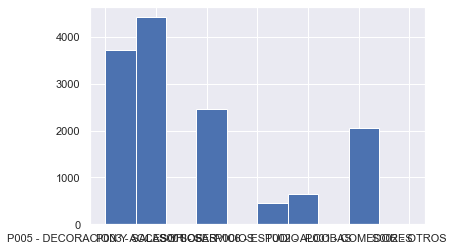

In [39]:
df5["DEPARTAMENTO"].hist();

## Gráficas

### Scatter Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


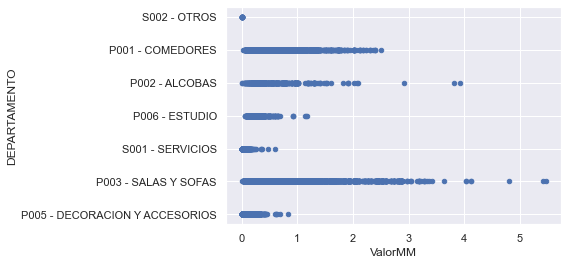

In [40]:
df5.plot.scatter(x='ValorMM',y='DEPARTAMENTO');

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


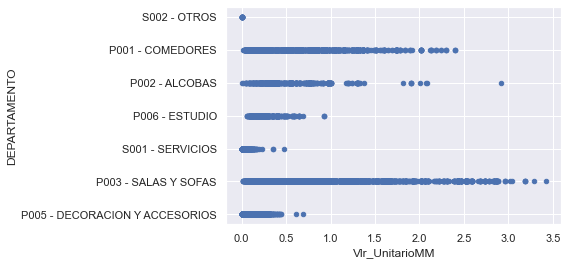

In [41]:
df5.plot.scatter(x='Vlr_UnitarioMM',y='DEPARTAMENTO');

## Consolidación de las ventas por semanas

Se consolida la información por semnas desde el 1 de octubre de 2021 hasta el 31 de marzo de 2022

In [42]:
dfSemana=df5.resample('W').sum()


In [43]:
dfSemana

,Cant,Valor,ValorMM,Vlr_UnitarioMM
Fecha,,,,
2021-10-03,345,116036717,116.036717,105.639975
2021-10-10,596,252640516,252.640516,236.426571
2021-10-17,604,206738046,206.738046,192.449349
2021-10-24,737,258088850,258.088850,237.619934
2021-10-31,649,226497807,226.497807,209.177107
2021-11-07,602,277627591,277.627591,262.693206
2021-11-14,616,259558853,259.558853,243.659611
2021-11-21,764,343455821,343.455821,334.090536
2021-11-28,678,312677662,312.677662,294.239306


## Gráfico

Mediante la función **Plot** se analiza el comportamiento de las ventas en cada una de las semanas

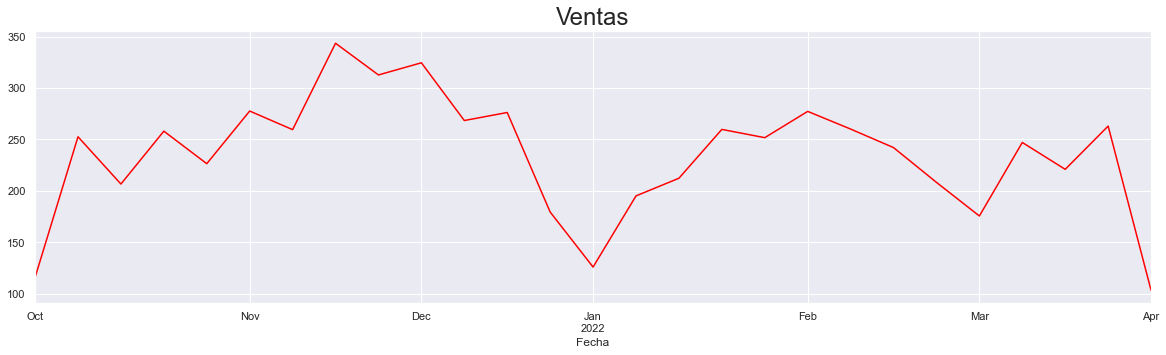

In [44]:

dfSemana['ValorMM'].plot(figsize = (20,5), color = "red")
plt.title("Ventas", size = 24)
plt.show()

## Consolidación de las ventas por días

Se consolida la información por **días** desde el 1 de octubre de 2021 hasta el 31 de marzo de 2022

In [45]:
dfDia=df5.resample('D').sum()

In [46]:
dfDia

,Cant,Valor,ValorMM,Vlr_UnitarioMM
Fecha,,,,
2021-10-01,66,31382591,31.382591,29.351831
2021-10-02,124,38540605,38.540605,36.788161
2021-10-03,155,46113521,46.113521,39.499984
2021-10-04,57,21304623,21.304623,20.252475
2021-10-05,68,32584416,32.584416,31.185879
...,...,...,...,...
2022-03-27,96,54116218,54.116218,52.517479
2022-03-28,74,30259922,30.259922,27.942972
2022-03-29,61,31955495,31.955495,29.350033


## Gráfico

Mediante la función **Plot** se analiza el comportamiento de las ventas por cada uno de los días, entre el 1 de octubre de 2021 hasta el 31 de marzo de 2022

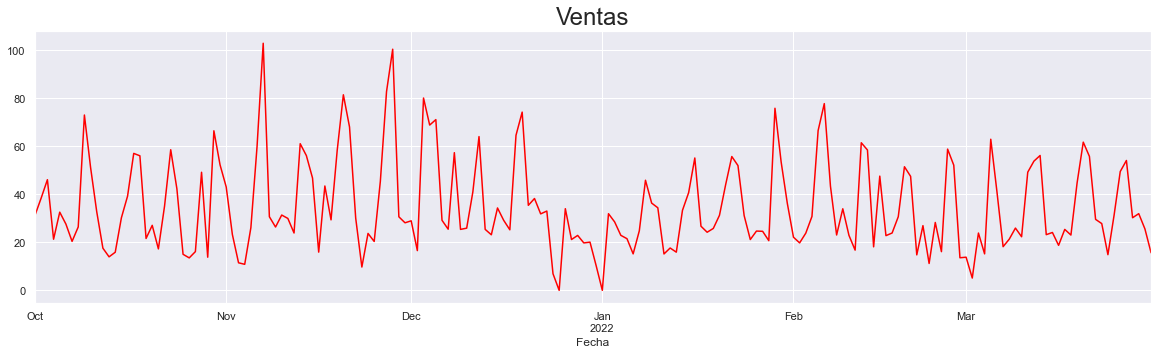

In [47]:
dfDia['ValorMM'].plot(figsize = (20,5), color = "red")
plt.title("Ventas", size = 24)
plt.show()

## Prueba de normalidad




Tomando la base consolidada por semanas y dias se busca realizar la prueba de normalidad para observar la relación de la recta con los diferentes puntos cercanos a ella a través de la gráfica de Q-Q Plot (quantile-quantile), teniendo en cuenta que es un método gráfico que nos permite comparar dos distribuciones de probabilidad de la variable *Ventas* al trazar sus cuantiles uno contra el otro. En este caso, lo ideal es que los puntos se acerquen a una recta diagonal, tal como se puede observar en la siguiente gráfica

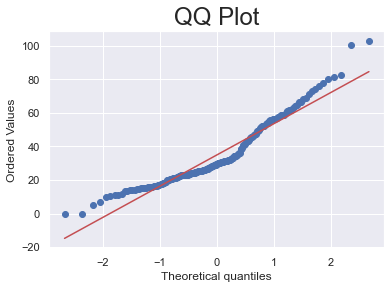

In [48]:
scipy.stats.probplot(dfDia.ValorMM, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

## Prueba de normalidad

Tomando la base consolidada por semanas se busca realizar la prueba de normalidad para observar la relación de la recta con los diferentes puntos cercanos a ella a través de la gráfica de QQ Plot.

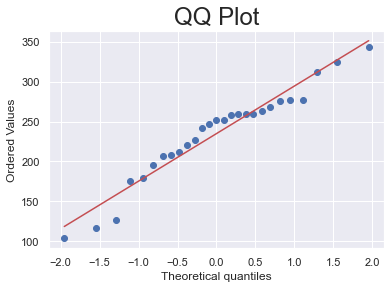

In [49]:
scipy.stats.probplot(dfSemana.ValorMM, plot =  plt)
plt.title("QQ Plot", size = 24)
plt.show()

## Análisis de regresión

In [50]:
import matplotlib.dates as mdates

<AxesSubplot:ylabel='ValorMM'>

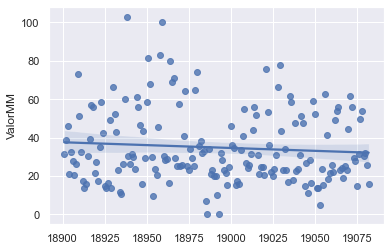

In [51]:
sns.regplot(x=mdates.date2num(dfDia.index),y=dfDia["ValorMM"])

<AxesSubplot:ylabel='ValorMM'>

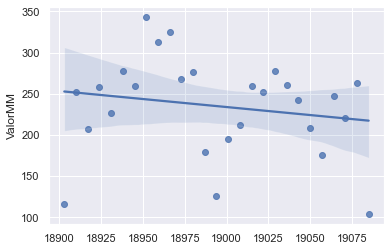

In [52]:
sns.regplot(x=mdates.date2num(dfSemana.index),y=dfSemana["ValorMM"])


### DESCOMPOSICION DE LA SERIE EN SUS ELEMENTOS

El análisis clásico de series temporales, considera que una serie temporal queda formada por tres componentes, estos componentes son:

* Componente tendencia: Este componente refleja un comportamiento o movimiento regular de la serie, a largo plazo.

* Componente estacional: Este componente refleja un comportamiento oscilatario a corto plazo del período regular, de duración menor o igual a un año.

* Componente aleatoria: Esta componente no responde a ningún patrón de comportamiento, sino que es el resultado de factores fortuitos o aleatorios que inciden de forma aislada en una serie de tiempo.

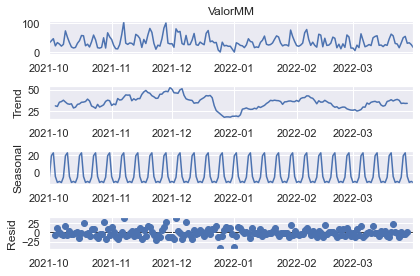

In [53]:
s_dec_additive = seasonal_decompose(dfDia["ValorMM"], model = "additive")
s_dec_additive.plot()
plt.show()

## Análisis del ruido blanco

In [54]:
#White Noise
wn = np.random.normal(loc = dfDia.ValorMM.mean(), scale = dfDia.ValorMM.std(), size = len(dfDia))
dfDia['wn'] = wn

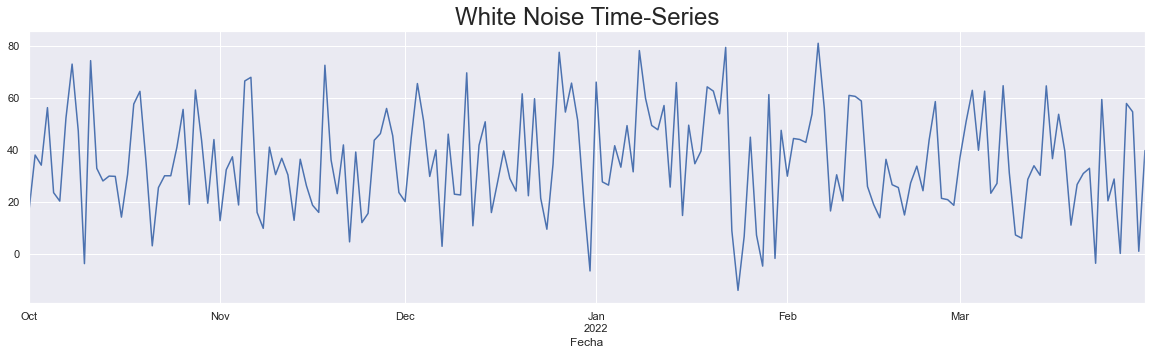

In [55]:
dfDia.wn.plot(figsize = (20,5))
plt.title("White Noise Time-Series", size= 24)
plt.show()

## Análisis de Autocorrelación 

In [56]:
dfDia.head()

,Cant,Valor,ValorMM,Vlr_UnitarioMM,wn
Fecha,,,,,
2021-10-01,66,31382591,31.382591,29.351831,16.557760
2021-10-02,124,38540605,38.540605,36.788161,38.078740
2021-10-03,155,46113521,46.113521,39.499984,34.186154
2021-10-04,57,21304623,21.304623,20.252475,56.328520
2021-10-05,68,32584416,32.584416,31.185879,23.598736


La autocorrelación es una técnica para analizar la estacionalidad. Traza la correlación de la serie de tiempo consigo misma en un lapso de tiempo diferente.

In [57]:
from pandas.plotting import autocorrelation_plot

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

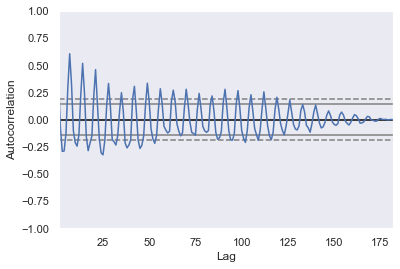

In [58]:
autocorrelation_plot(dfDia["ValorMM"])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

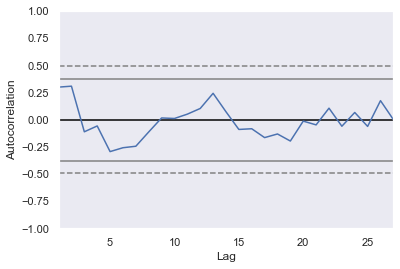

In [59]:
autocorrelation_plot(dfSemana["ValorMM"])

## Modelo de Autoregresión de la serie

Se puede observar que existe una alta autocorrelacion en la serie, por lo tanto de manera prelimiar definimremos un modelo de Auotregresion.

In [60]:
dfValor_Dia=dfDia.copy()

In [61]:
dfValor_Dia=dfValor_Dia[["ValorMM"]]

In [62]:
dfPedido_dia=dfValor_Dia.reset_index()


In [63]:
dfPedido_dia=dfPedido_dia[["ValorMM"]]


In [64]:
train_size=int(dfPedido_dia.shape[0]*0.8)
train_size

145

In [65]:
train=dfPedido_dia.ValorMM[0:train_size]

In [66]:
test=dfPedido_dia.ValorMM[train_size:]

In [67]:
test_y=test

In [68]:
from statsmodels.tsa.ar_model import AR

In [69]:
model=AR(train)
model_fit=model.fit()

C:\Users\ING GUILLERMO\anaconda3\lib\site-packages\statsmodels\tsa\ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureWarn

In [70]:
predicciones= model_fit.predict(start=len(train), end=len(train)+len(test)-1)

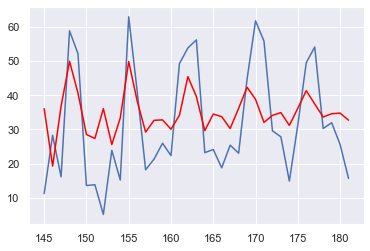

In [71]:
plt.plot(test_y)
plt.plot(predicciones, color='red')



*******************************************************************************************************************************



## <span style="color:blue" aline="center">Segunda Entrega: Análisis y Visualización de los Datos por Medio de Gráficos</span>

Con el propósito de realizar una exploración analítica de los datos de la Compañía Fiotti, el equipo de este proyecto se ha apoyado en las bondades que ofrece la librería **Matploit**, que es uno de los paquetes de Python más utilizados para gráficos **2D**, la cual es muy versatil para la visualización y análisis de los datos mediante gráficos estadísticos dependiendo de la naturaleza o estructua de los datos objeto de estudio.

Así las cosas, para continuar con el desarrollo de este proyecto, utilizaremos distintas funciones de esta librería para análisis de variables cualitativas y cuantitavias que hacen parte de la base de datos de pedidos facilitada por la compañía para el análisis requerido, entre las funcionalidades a utilizar están: **Plot, Scatter, Boxplot, Subplot, Seaborn, Countplot, Stripplot, swarmplot, Violinplot**, entre otras.

### <span style="color:blue">Gráficos Pyplot</span>

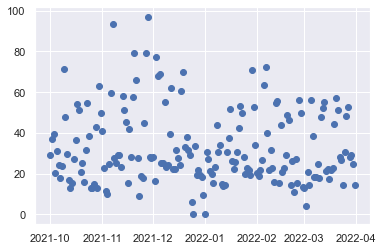

In [53]:
plt.plot(dfDia.Vlr_UnitarioMM,'bo') #dfDia.Cant,

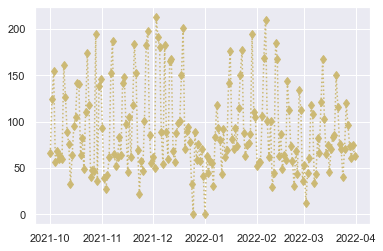

In [54]:
plt.plot(dfDia.Cant,'yd:') #dfDia.Cant,

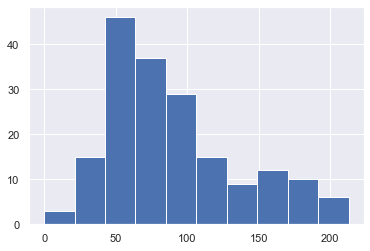

In [55]:
plt.hist(dfDia.Cant)
plt.show()

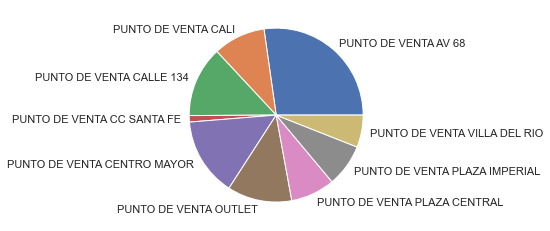

In [56]:
etiq=(Vlr_Pedidos_Tienda.index)
plt.pie(Vlr_Pedidos_Tienda.Cant, labels=etiq) #plt.pie(Vlr_Pedidos_Tienda.index)

plt.show()

## <span style="color:blue">Gráficos Scatter</span>

Por medio de este gráfico de dispersión, se buscar comparar y analizar los valores de las variables Cant con Vlr_UnitarioMM, y con la gráfica resultante podemos identificar la posible correlación entre las dos variables.

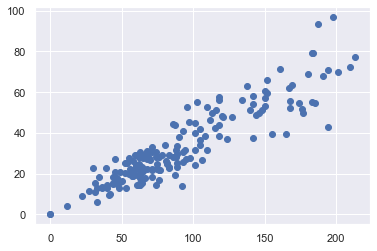

In [57]:
plt.scatter(dfDia.Cant,dfDia.Vlr_UnitarioMM)

In [58]:
dfDia.head()

,Cant,Valor,ValorMM,Vlr_UnitarioMM
Fecha,,,,
2021-10-01,66,31382591,31.382591,29.351831
2021-10-02,124,38540605,38.540605,36.788161
2021-10-03,155,46113521,46.113521,39.499984
2021-10-04,57,21304623,21.304623,20.252475
2021-10-05,68,32584416,32.584416,31.185879


## <span style="color:blue">Gráficos de cajas o marginales</span>
Por medio de este gráfico, buscamos identificar la media entre los datos de la variable **ValorMM**, así como su distribución en el dataset

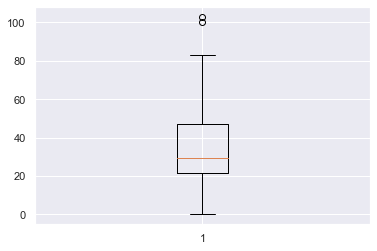

In [59]:
plt.boxplot(dfDia.ValorMM)
plt.show()

## <span style="color:blue">Subplot</span>

Por medio de esta funcionalidad creamos la siguente matriz de gráficos, que para nuestro ejemplo es una fila con dos columnas, en la cual se ilustra un gráfico de dispersión con interlineado de color rojo en la fila 1 columan 1 con la variable **ValorMM** y un histograma en la fila 1 columna 2 con la variables **Cant**

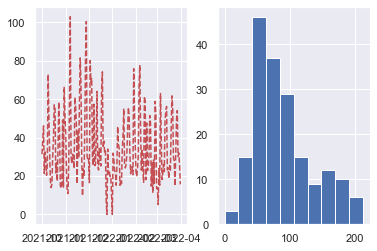

In [60]:
plt.subplot(1,2,1)
plt.plot(dfDia.ValorMM, 'r--')
plt.subplot(1,2,2)
plt.hist(dfDia.Cant)
plt.show()

Siguiendo el contexto de la funcionalidad **Subplot**, creamos la siguente matriz de gráficos similar al punto anterior, solo que para este ejemplo utilizamos un histograma en la fila 1 columna 2 para ilustrar la frecuencia de las varialbes **Cant** y **Vlr_UnitarioMM**.

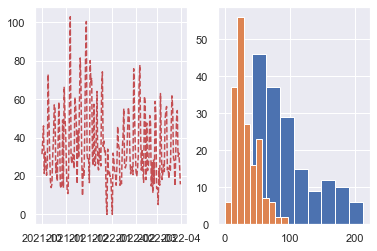

In [61]:
plt.subplot(1,2,1)
plt.plot(dfDia.ValorMM, 'r--')

plt.subplot(1,2,2)
plt.hist(dfDia.Cant)
plt.hist(dfDia.Vlr_UnitarioMM)
plt.show()

## <span style="color:blue">Gráficos orientados a objetos</span>

Utiliando este estilo, se parametriza la figura que se va a usar como el lienzo de los datos de la variable **Vlr_UnitarioMM** y sus ejes, mediante las variables u objetos como son **fig** y **ejes** y con sus métodos y atributos llevamos a cabo la graficación y visualización de la varible mencionada de una forma personalizada.

C:\Users\aguecham\AppData\Local\Temp/ipykernel_6384/120122108.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


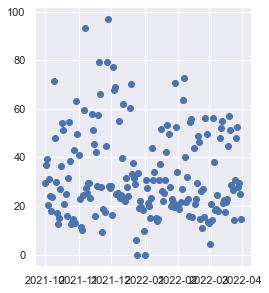

In [62]:
fig =plt.figure()
ejes=fig.add_axes([0.1,0.1,0.5,0.9])
ejes.plot(dfDia.Vlr_UnitarioMM,'bo')
fig.show()

En este nuevo caso, utilizamos dos ejes como son **eje** y **eje2** con las posiciones en el lienzo de **0.1 y 0.1** para **eje** y **0.2 y 0.55** para **eje2** y los sigientes parámetros que corresponde al tamaño del lienzo utilizamos los valores **0.5 y 0.9**, **0.4 y 0.3** respectivamente para cada uno de los ejes. 

De igual forma se definieron las varibles **Vlr_UnitarioMM** para dibujar en el eje principal (eje) y la variable **Cant** para dibujar en el eje interior (eje2), tal como se ilustra a continuación:

C:\Users\aguecham\AppData\Local\Temp/ipykernel_6384/2603451103.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


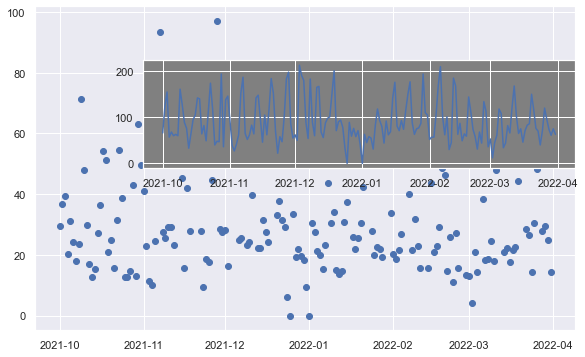

In [66]:
fig =plt.figure(figsize=(15,5))
eje=fig.add_axes([0.1,0.1,0.5,0.9])
eje2=fig.add_axes([0.2,0.55,0.4,0.3])
eje.plot(dfDia.Vlr_UnitarioMM,'bo')
eje2.plot(dfDia.Cant)
eje2.set_facecolor('gray')
fig.show()

## <span style="color:blue">Subplots</span>

Esta funcionalidad utiliza los métodos orientados a objetos señalados en los dos apartados anteriores, en el cual utiliamos la instrucción **plt.subplots**, el cual nos devuelve la figura del objeto **fig** con un arreglo del objeto **eje**.

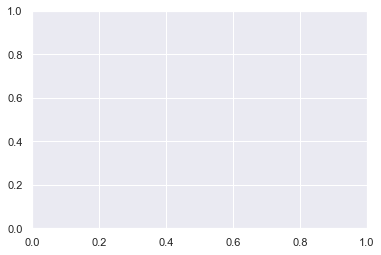

In [67]:
fig, eje=plt.subplots()

Así las cosas, bajo estos conceptos configuramos el objeto ***eje*** con una fila y dos columnas en las cuales se graficarán las variables **Vlr_UnitarioMM** y **Cant** utilizando los índices del array creado, así mismo se personalizó  el tamaño del gráfico como el  título de cada una de las gráficas.

De otra parte se incluyó para este ejercico el método ***tight_layout()*** para una mejor visulalización de los gráficos.

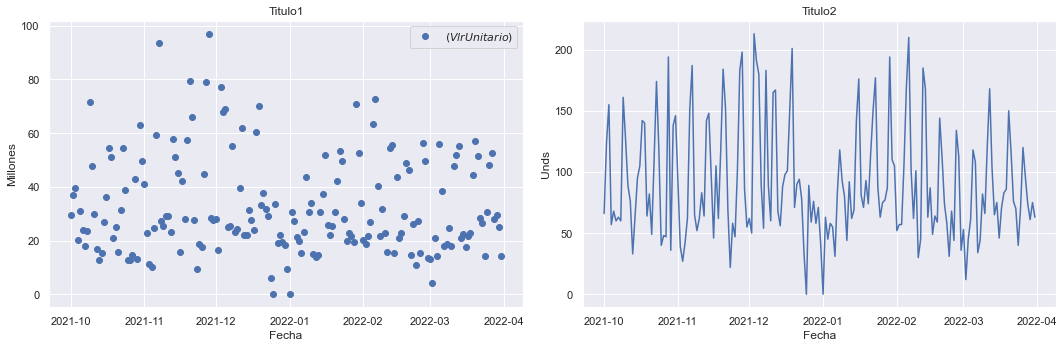

In [68]:
fig, eje=plt.subplots(nrows=1,ncols=2, figsize=(15,5))
eje[0].plot(dfDia.Vlr_UnitarioMM,'bo',label="$(Vlr Unitario)$")
eje[0].set_title('Titulo1')
eje[0].set_xlabel('Fecha')
eje[0].set_ylabel('Millones')
eje[0].legend()
eje[1].plot(dfDia.Cant)
eje[1].set_title('Titulo2')
eje[1].set_xlabel('Fecha')
eje[1].set_ylabel('Unds')
fig.tight_layout()

## <span style="color:blue">Gráficos de barras</span>

### Personalización del dataset para la utilización del gráfico de barras

In [69]:
df6=df5.copy()

In [70]:
df6.head()

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,...,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA,ValorMM,Vlr_UnitarioMM
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,...,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS,0.607441,0.607441
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,...,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES,2.679748,2.679748
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,...,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L,2.834370,2.834370
2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,1,...,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE,0.060000,0.060000
2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,1,...,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES,0.193912,0.193912


In [71]:
df7=df6.reset_index()

In [72]:
df7.tail()

,Fecha,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,...,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA,ValorMM,Vlr_UnitarioMM
13762,2022-01-06,104,PUNTO DE VENTA CALLE 134,1773,XA0740,SILLA AUXILIAR DELICIA AZUL,PV,PV-00000423,Cumplido,104,...,DUARTE ANDREA,F001,SANABRIA NIDIA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,POL - POLTRONAS,POLT - POLTRONAS,0.371344,0.371344
13763,2022-01-06,102,PUNTO DE VENTA CENTRO MAYOR,2012,XC0072,PUFF DOBLE WITHBUTH GRIS,PV,PV-00000548,Cumplido,1,...,BARRERA MARIA ANGELICA,F032,RESTREPO JHONNATAN,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,PUF - PUFF,PUFF - PUFF,0.223445,0.223445
13764,2022-01-07,101,PUNTO DE VENTA OUTLET,4158,C00438,COJIN DINI GRANDE,PV,PV-00000453,Cumplido,101,...,MONTEALEGRE QUINTERO BRIGITTE,F008,CASTILLO SIERRA ANDRES,PRODUCTO TERMINADO TAPICERIA,NAC - NACIONAL,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,COJN - COJINES,0.033177,0.016588
13765,2022-01-08,100,PUNTO DE VENTA AV 68,2096,XC0120,COMEDOR ESTHER CAOBA 4P WENGUE 4C,PV,PV-00001129,Cumplido,1,...,SALCEDO TRIANA MARTHA MAGLYS,F030,GRANADOS CARLOS,MERCANCIA IMPORTADA,IMP - IMPORTADO,P001 - COMEDORES,SCO - SET DE COMEDOR,SET4 - SET 4P,1.329328,1.329328
13766,2022-01-10,105,PUNTO DE VENTA PLAZA CENTRAL,6980,SS0155,SERVICIO CAMBIO COLOR PATAS C/U,PV,PV-00000301,Cumplido,1,...,CARDONA LUISA,F012,FUENTES HERRERA OSCAR JAVIER,VENTA SERV ARREGLOS MUEBLES,,S001 - SERVICIOS,S00 - OTROS,OTRO - OTROS,0.040000,0.010000


In [73]:
dfDIa_Detalle=df7.groupby(['Fecha','Desc_CO','DEPARTAMENTO','SUBCATEGORIA']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        'Vlr_UnitarioMM':np.mean
        
    }

)

In [74]:
dfDIa_Detalle

ValorMM  \
Fecha      Desc_CO                      DEPARTAMENTO                   SUBCATEGORIA                          
2021-10-01 PUNTO DE VENTA AV 68         P001 - COMEDORES               CONS - CONSOLAS            0.320084   
                                                                       SET6 - SET 6P              0.811013   
                                        P003 - SALAS Y SOFAS           MAUX - MESAS AUXILIARES    0.184790   
                                                                       MODU - SOFAS MODULARES     2.679748   
                                                                       POLT - POLTRONAS           0.818320   
...                                                                                                    ...   
2022-03-31 PUNTO DE VENTA VILLA DEL RIO P003 - SALAS Y SOFAS           RCL2 - RECLINABLES 2P      1.638572   
                                                                       SOF3 - SOFA 3P             1.478067   
                                        P005 - DECORACION Y ACCESORIOS COJN - COJINES             0.075546   
                                                                       TAP2 - TAPETES 120X180 CM  0.164622   
                                        S001 - SERVICIOS               TRAN - TRANSPORTE          0.065000   

                                                                                                  Cant  \
Fecha      Desc_CO                      DEPARTAMENTO                   SUBCATEGORIA                      
2021-10-01 PUNTO DE VENTA AV 68         P001 - COMEDORES               CONS - CONSOLAS               1   
                                                                       SET6 - SET 6P                 1   
                                        P003 - SALAS Y SOFAS           MAUX - MESAS AUXILIARES       1   
                                                                       MODU - SOFAS MODULARES        1   
                                                                       POLT - POLTRONAS              2   
...                                                                                                ...   
2022-03-31 PUNTO DE VENTA VILLA DEL RIO P003 - SALAS Y SOFAS           RCL2 - RECLINABLES 2P         1   
                                                                       SOF3 - SOFA 3P                1   
                                        P005 - DECORACION Y ACCESORIOS COJN - COJINES                1   
                                                                       TAP2 - TAPETES 120X180 CM     1   
                                        S001 - SERVICIOS               TRAN - TRANSPORTE             1   

                                                                                                  Vlr_UnitarioMM  
Fecha      Desc_CO                      DEPARTAMENTO                   SUBCATEGORIA                               
2021-10-01 PUNTO DE VENTA AV 68         P001 - COMEDORES               CONS - CONSOLAS                  0.320084  
                                                                       SET6 - SET 6P                    0.811013  
                                        P003 - SALAS Y SOFAS           MAUX - MESAS AUXILIARES          0.184790  
                                                                       MODU - SOFAS MODULARES           2.679748  
                                                                       POLT - POLTRONAS                 0.409160  
...                                                                                                          ...  
2022-03-31 PUNTO DE VENTA VILLA DEL RIO P003 - SALAS Y SOFAS           RCL2 - RECLINABLES 2P            1.638572  
                                                                       SOF3 - SOFA 3P                   1.478067  
                                        P005 - DECORACION Y ACCESORIOS COJN - COJINES                   0.075546  
                        

In [75]:
dfDIa_Detalle.head()

ValorMM  \
Fecha      Desc_CO              DEPARTAMENTO         SUBCATEGORIA                        
2021-10-01 PUNTO DE VENTA AV 68 P001 - COMEDORES     CONS - CONSOLAS          0.320084   
                                                     SET6 - SET 6P            0.811013   
                                P003 - SALAS Y SOFAS MAUX - MESAS AUXILIARES  0.184790   
                                                     MODU - SOFAS MODULARES   2.679748   
                                                     POLT - POLTRONAS         0.818320   

                                                                              Cant  \
Fecha      Desc_CO              DEPARTAMENTO         SUBCATEGORIA                    
2021-10-01 PUNTO DE VENTA AV 68 P001 - COMEDORES     CONS - CONSOLAS             1   
                                                     SET6 - SET 6P               1   
                                P003 - SALAS Y SOFAS MAUX - MESAS AUXILIARES     1   
                                                     MODU - SOFAS MODULARES      1   
                                                     POLT - POLTRONAS            2   

                                                                              Vlr_UnitarioMM  
Fecha      Desc_CO              DEPARTAMENTO         SUBCATEGORIA                             
2021-10-01 PUNTO DE VENTA AV 68 P001 - COMEDORES     CONS - CONSOLAS                0.320084  
                                                     SET6 - SET 6P                  0.811013  
                                P003 - SALAS Y SOFAS MAUX - MESAS AUXILIARES        0.184790  
                                                     MODU - SOFAS MODULARES         2.679748  
                                                     POLT - POLTRONAS               0.409160

In [76]:
dfDIa_Detalle=dfDIa_Detalle.reset_index()

In [77]:
dfDIa_Detalle

,Fecha,Desc_CO,DEPARTAMENTO,SUBCATEGORIA,ValorMM,Cant,Vlr_UnitarioMM
0,2021-10-01,PUNTO DE VENTA AV 68,P001 - COMEDORES,CONS - CONSOLAS,0.320084,1,0.320084
1,2021-10-01,PUNTO DE VENTA AV 68,P001 - COMEDORES,SET6 - SET 6P,0.811013,1,0.811013
2,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,MAUX - MESAS AUXILIARES,0.184790,1,0.184790
3,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,MODU - SOFAS MODULARES,2.679748,1,2.679748
4,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,POLT - POLTRONAS,0.818320,2,0.409160
...,...,...,...,...,...,...,...
9128,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P003 - SALAS Y SOFAS,RCL2 - RECLINABLES 2P,1.638572,1,1.638572
9129,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P003 - SALAS Y SOFAS,SOF3 - SOFA 3P,1.478067,1,1.478067
9130,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P005 - DECORACION Y ACCESORIOS,COJN - COJINES,0.075546,1,0.075546
9131,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P005 - DECORACION Y ACCESORIOS,TAP2 - TAPETES 120X180 CM,0.164622,1,0.164622


## <span style="color:blue">Gráfico de barra No 1</span>

Con los datos almacenados en el dataset llamado ***dfDIa_Detalle***, utilizamos la gráfica de barras ***plt.bar***, para graficar las variables **Desc_CO** y **Desc_CO**, como se ilustra a continuación:

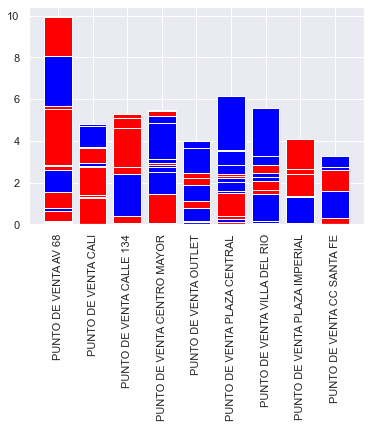

In [78]:
plt.bar(dfDIa_Detalle.Desc_CO,dfDIa_Detalle.ValorMM, color=['red','blue'])
plt.xticks(rotation=90)
plt.show()

## <span style="color:blue">Gráfico de barra No 2</span>

Con los datos almacenados en el dataset llamado ***Vlr_Pedidos_Tienda***, utilizamos la gráfica de barras horizontal ***plt.barh***, para graficar en el eje **X** la variable categórica **Desc_CO** y en el eje **Y** se representan los valores de la varible cuantitativa **ValorMM**, como se ilustra a continuación:

In [79]:
Vlr_Pedidos_Tienda=Vlr_Pedidos_Tienda.reset_index()

In [80]:
Vlr_Pedidos_Tienda['Vlr_UnitarioMM']=Vlr_Pedidos_Tienda['ValorMM']/Vlr_Pedidos_Tienda['Cant']

In [81]:
Vlr_Pedidos_Tienda.head()

,Desc_CO,Cant,Valor,ValorMM,Vlr_UnitarioMM
0,PUNTO DE VENTA AV 68,4484,1863683909,1863.683909,0.415630
1,PUNTO DE VENTA CALI,1598,638843822,638.843822,0.399777
2,PUNTO DE VENTA CALLE 134,2163,907878232,907.878232,0.419731
3,PUNTO DE VENTA CC SANTA FE,197,59973253,59.973253,0.304433
4,PUNTO DE VENTA CENTRO MAYOR,2401,1066379557,1066.379557,0.444140


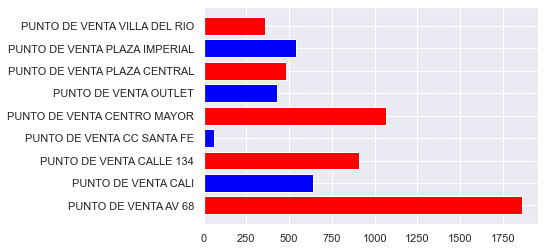

In [82]:
Vlr_Pedidos_Tienda
plt.barh(Vlr_Pedidos_Tienda.Desc_CO,Vlr_Pedidos_Tienda.ValorMM, color=['red','blue'])
#plt.xticks(rotation=90)
plt.show()

 ## <span style="color:blue">Gráfico de barra No 3</span>

Con los datos almacenados en el dataset llamado ***Vlr_Pedidos_Tienda***, utilizamos la gráfica de barras ***plt.bar***, para graficar la variable categórica **Desc_CO** en el eje **X** y la variable cuantitiva **Cant** sobre el eje **Y**, asím mismo, se utiliza la instrucción ***plt.xticks(rotation=90)*** para una merjor visualización de las etiquetas de las barras sobre el eje x , como se ilustra a continuación:

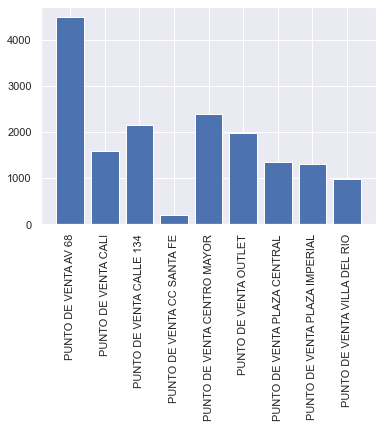

In [83]:
plt.bar(Vlr_Pedidos_Tienda.Desc_CO,Vlr_Pedidos_Tienda.Cant)
plt.xticks(rotation=90)
plt.show()

 ## <span style="color:blue">Gráfico de barra No 4</span>

Con los datos almacenados en el dataset llamado ***Vlr_Pedidos_Tienda***, utilizamos la gráfica de barras ***plt.bar***, para graficar la variable categórica **Desc_CO** en el eje **X** y la variable cuantitiva **Vlr_UnitarioMM** sobre el eje **Y**, asím mismo, se utiliza la instrucción ***plt.xticks(rotation=90)*** para una merjor visualización de las etiquetas de las barras sobre el eje x , como se ilustra a continuación:

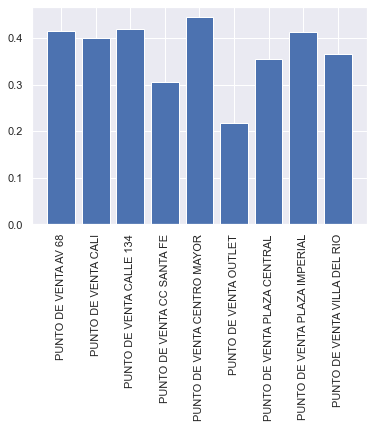

In [84]:
plt.bar(Vlr_Pedidos_Tienda.Desc_CO,Vlr_Pedidos_Tienda.Vlr_UnitarioMM)
plt.xticks(rotation=90)
plt.show()

## <span style="color:blue">Gráficos con histogramas</span>

### Preparación del dataset para el trabajo con histogramas

In [85]:
dfDIa_Detalle.head()

,Fecha,Desc_CO,DEPARTAMENTO,SUBCATEGORIA,ValorMM,Cant,Vlr_UnitarioMM
0,2021-10-01,PUNTO DE VENTA AV 68,P001 - COMEDORES,CONS - CONSOLAS,0.320084,1,0.320084
1,2021-10-01,PUNTO DE VENTA AV 68,P001 - COMEDORES,SET6 - SET 6P,0.811013,1,0.811013
2,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,MAUX - MESAS AUXILIARES,0.184790,1,0.184790
3,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,MODU - SOFAS MODULARES,2.679748,1,2.679748
4,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,POLT - POLTRONAS,0.818320,2,0.409160


In [86]:
dfDpto_Dia=dfDIa_Detalle.groupby(['Fecha','DEPARTAMENTO']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        'Vlr_UnitarioMM':np.mean
        
    }

)

In [87]:
dfDpto_Dia.head()

ValorMM  Cant  Vlr_UnitarioMM
Fecha      DEPARTAMENTO                                                   
2021-10-01 P001 - COMEDORES                 1.996476     4        0.499119
           P002 - ALCOBAS                   4.246443     5        0.725102
           P003 - SALAS Y SOFAS            22.196720    24        1.050296
           P005 - DECORACION Y ACCESORIOS   1.773162    20        0.132832
           P006 - ESTUDIO                   0.284790     1        0.284790

In [88]:
dfDpto_Dia=dfDpto_Dia.reset_index()

In [89]:
dfDpto_Dia.head()

,Fecha,DEPARTAMENTO,ValorMM,Cant,Vlr_UnitarioMM
0,2021-10-01,P001 - COMEDORES,1.996476,4,0.499119
1,2021-10-01,P002 - ALCOBAS,4.246443,5,0.725102
2,2021-10-01,P003 - SALAS Y SOFAS,22.196720,24,1.050296
3,2021-10-01,P005 - DECORACION Y ACCESORIOS,1.773162,20,0.132832
4,2021-10-01,P006 - ESTUDIO,0.284790,1,0.284790


In [90]:
dfDpto_Dia['Vlr_UnitarioMM']=dfDpto_Dia['ValorMM']/dfDpto_Dia['Cant']

In [91]:
dfDpto_Dia.head()

,Fecha,DEPARTAMENTO,ValorMM,Cant,Vlr_UnitarioMM
0,2021-10-01,P001 - COMEDORES,1.996476,4,0.499119
1,2021-10-01,P002 - ALCOBAS,4.246443,5,0.849289
2,2021-10-01,P003 - SALAS Y SOFAS,22.196720,24,0.924863
3,2021-10-01,P005 - DECORACION Y ACCESORIOS,1.773162,20,0.088658
4,2021-10-01,P006 - ESTUDIO,0.284790,1,0.284790


## <span style="color:blue">Histograma No 1</span>

A partir de los datos preparados previamente, se busca analizar a través del gráfico con histograma el compartamiento de un departamento de ventas dela compañía FIOTTI como es el de **Salas y Sofás**, en el cual se analiza la varible ***ValorMM***, de igual forma para este ejecicio se utilizó el parámetro ***histtype='step'*** para visualizar el gráfico de una forma delineada, como se ilustra a continuación:

In [92]:
dfSalas_Dia = dfDpto_Dia[dfDpto_Dia['DEPARTAMENTO'] == 'P003 - SALAS Y SOFAS']

In [93]:
dfSalas_Dia.head()

,Fecha,DEPARTAMENTO,ValorMM,Cant,Vlr_UnitarioMM
2,2021-10-01,P003 - SALAS Y SOFAS,22.196720,24,0.924863
8,2021-10-02,P003 - SALAS Y SOFAS,21.871053,29,0.754174
14,2021-10-03,P003 - SALAS Y SOFAS,23.413277,26,0.900511
19,2021-10-04,P003 - SALAS Y SOFAS,11.434653,13,0.879589
25,2021-10-05,P003 - SALAS Y SOFAS,23.737226,25,0.949489


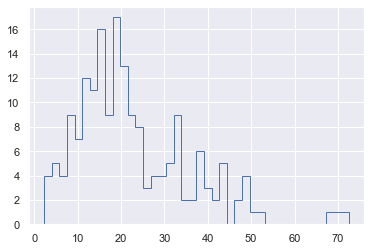

In [94]:
plt.hist(dfSalas_Dia.ValorMM, bins=40 , histtype='step' )
plt.show()

## <span style="color:blue">Histograma No 2</span>

A partir de los datos preparados previamente, se busca analizar a través del gráfico con histograma el compartamiento de un departamento de ventas dela compañía FIOTTI como es el de **Salas y Sofás**, en el cual se analiza la varible ***VVlr_UnitarioMM***, como se ilustra a continuación:

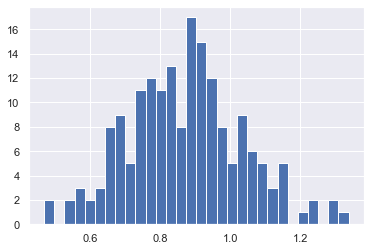

In [95]:
plt.hist(dfSalas_Dia.Vlr_UnitarioMM, bins=30 )
plt.show()

## <span style="color:blue">Gráficos con Boxplot</span>

Con este gráfico de Boxplot, se busca resaltar los aspectos de la distribución de los datos cuantitativos de la variable ***ValorMM***, dentro de los parámetros utilizados está el **patch_artist=Tru**, con el cual llena el rango intercuartílico, así como el parámetro **notch=True**, con el cual se enfoca a visualizar los datos a la mediana, también se puede identificar los datos atípicos con la instrucción **showfliers=True**

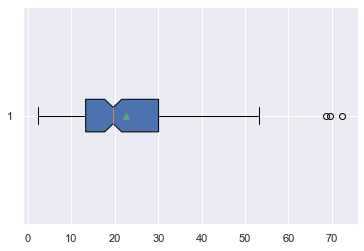

In [96]:
plt.boxplot(dfSalas_Dia.ValorMM, vert=False,patch_artist=True, notch=True,showfliers=True, showmeans=True )
plt.show()

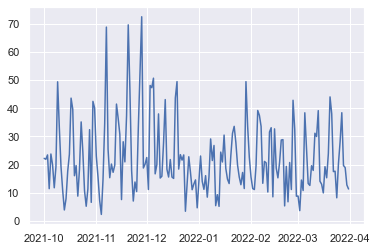

In [97]:
plt.plot(dfSalas_Dia.Fecha,dfSalas_Dia.ValorMM)

## <span style="color:blue">Gráficos Scatter</span>

Los gráficos ***Scatter*** son gráficos de dispersión, con el cual se busca analizar las variables ***ValorMM*** y ***Vlr_UnitarioMM***

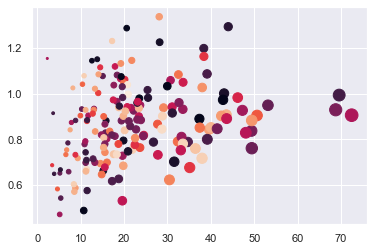

In [98]:
colors=np.random.rand(180)
plt.scatter(dfSalas_Dia.ValorMM,dfSalas_Dia.Vlr_UnitarioMM, s=dfSalas_Dia.Cant*2, c=colors)
plt.show()

## <span style="color:blue">Gráficos Seaborn</span>

### Preparación del dataset para el trabajo con gráficos Seaborn

In [99]:
Vlr_Pedidos_Depto=dfDIa_Detalle.groupby(['DEPARTAMENTO']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        
        
    }

)
Vlr_Pedidos_Depto

,ValorMM,Cant
DEPARTAMENTO,,
P001 - COMEDORES,1440.861082,3109
P002 - ALCOBAS,346.156976,719
P003 - SALAS Y SOFAS,4052.904012,4663
P005 - DECORACION Y ACCESORIOS,244.440646,4835
P006 - ESTUDIO,123.135982,472
S001 - SERVICIOS,137.953500,2645
S002 - OTROS,0.031281,17


In [100]:
Vlr_Pedidos_Depto=Vlr_Pedidos_Depto.reset_index()

## <span style="color:blue">Gráfico Seaborn No 1</span>

Dentro de este ejercicio se tomo el dataset ***Vlr_Pedidos_Depto*** con el cual se busca graficar las variables **Departamento** y **Cant**, así mismo se utilizó la instrucción **set** para configurar el gráfico de barras de Seaborn con las diferentes opciones gráficas para la visualización de las barras

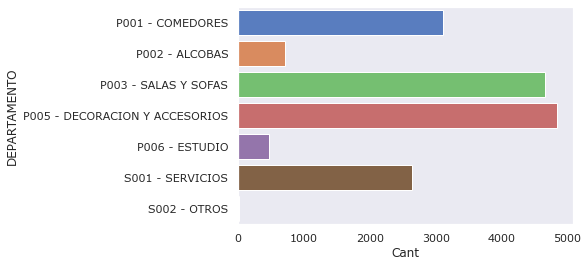

In [101]:
sns.set(style='dark',palette='muted',font="Verdana",font_scale=1)
sns.barplot(data=Vlr_Pedidos_Depto, y= 'DEPARTAMENTO', x= 'Cant', orient='h')
plt.show()

In [102]:
Vlr_Pedidos_Depto_Categoria=dfDIa_Detalle.groupby(['DEPARTAMENTO','SUBCATEGORIA']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        
        
    }

)
Vlr_Pedidos_Depto_Categoria

ValorMM  Cant
DEPARTAMENTO     SUBCATEGORIA                              
P001 - COMEDORES BIFT - BIFFET              37.254226    92
                 CONS - CONSOLAS            15.703002    42
                 MBAR - MESAS DE BAR        17.733161    39
                 MCO4 - MESAS DE 4P         34.550254    88
                 MCO6 - MESAS DE 6P         51.222472    74
...                                               ...   ...
P006 - ESTUDIO   SIOF - SILLA OFICINA       20.735123    81
S001 - SERVICIOS OTRO - OTROS               10.058000   272
                 STAP - SERVICIO TAPIZADO    1.475000     5
                 TRAN - TRANSPORTE         126.420500  2368
S002 - OTROS     OTRO - OTROS                0.031281    17

[89 rows x 2 columns]

In [103]:
Vlr_Pedidos_Depto_Categoria=Vlr_Pedidos_Depto_Categoria.reset_index()

In [104]:
Vlr_Pedidos_Depto_Categoria

,DEPARTAMENTO,SUBCATEGORIA,ValorMM,Cant
0,P001 - COMEDORES,BIFT - BIFFET,37.254226,92
1,P001 - COMEDORES,CONS - CONSOLAS,15.703002,42
2,P001 - COMEDORES,MBAR - MESAS DE BAR,17.733161,39
3,P001 - COMEDORES,MCO4 - MESAS DE 4P,34.550254,88
4,P001 - COMEDORES,MCO6 - MESAS DE 6P,51.222472,74
...,...,...,...,...
84,P006 - ESTUDIO,SIOF - SILLA OFICINA,20.735123,81
85,S001 - SERVICIOS,OTRO - OTROS,10.058000,272
86,S001 - SERVICIOS,STAP - SERVICIO TAPIZADO,1.475000,5
87,S001 - SERVICIOS,TRAN - TRANSPORTE,126.420500,2368


## <span style="color:blue">Gráfico Seaborn No 2</span>

Dentro de este ejercicio se tomo el dataset ***Vlr_Pedidos_Depto_Categoria*** con el cual se busca graficar las variables **Departamento** y **Cant**, así mismo se utilizó la instrucción **set** para configurar el gráfico de barras de Seaborn con las diferentes opciones gráficas para la visualización de las barras

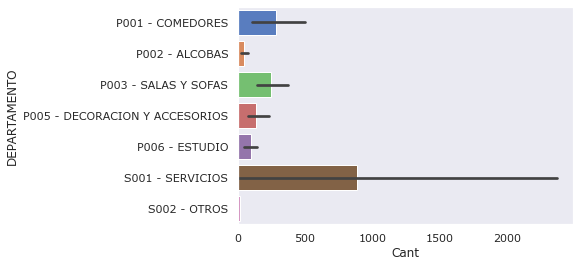

In [105]:
sns.set(style='dark',palette='muted',font="Verdana",font_scale=1)
sns.barplot(data=Vlr_Pedidos_Depto_Categoria, y= 'DEPARTAMENTO', x= 'Cant', orient='h')
plt.show()

In [106]:
dfDIa_Detalle.tail()

,Fecha,Desc_CO,DEPARTAMENTO,SUBCATEGORIA,ValorMM,Cant,Vlr_UnitarioMM
9128,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P003 - SALAS Y SOFAS,RCL2 - RECLINABLES 2P,1.638572,1,1.638572
9129,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P003 - SALAS Y SOFAS,SOF3 - SOFA 3P,1.478067,1,1.478067
9130,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P005 - DECORACION Y ACCESORIOS,COJN - COJINES,0.075546,1,0.075546
9131,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,P005 - DECORACION Y ACCESORIOS,TAP2 - TAPETES 120X180 CM,0.164622,1,0.164622
9132,2022-03-31,PUNTO DE VENTA VILLA DEL RIO,S001 - SERVICIOS,TRAN - TRANSPORTE,0.065000,1,0.065000


In [107]:
Vlr_Pedidos_Depto_Categoria_CO=dfDIa_Detalle.groupby(['Desc_CO','DEPARTAMENTO','SUBCATEGORIA']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        
        
    }

)
Vlr_Pedidos_Depto_Categoria_CO

ValorMM  \
Desc_CO                      DEPARTAMENTO     SUBCATEGORIA                      
PUNTO DE VENTA AV 68         P001 - COMEDORES BIFT - BIFFET         13.312253   
                                              CONS - CONSOLAS        5.493576   
                                              MBAR - MESAS DE BAR    8.788500   
                                              MCO4 - MESAS DE 4P     8.364314   
                                              MCO6 - MESAS DE 6P    10.841615   
...                                                                       ...   
PUNTO DE VENTA VILLA DEL RIO P006 - ESTUDIO   ESTA - ESTANTES        0.210840   
                                              SIOF - SILLA OFICINA   1.659917   
                             S001 - SERVICIOS OTRO - OTROS           0.144000   
                                              TRAN - TRANSPORTE      7.662000   
                             S002 - OTROS     OTRO - OTROS           0.001840   

                                                                    Cant  
Desc_CO                      DEPARTAMENTO     SUBCATEGORIA                
PUNTO DE VENTA AV 68         P001 - COMEDORES BIFT - BIFFET           31  
                                              CONS - CONSOLAS         15  
                                              MBAR - MESAS DE BAR     16  
                                              MCO4 - MESAS DE 4P      20  
                                              MCO6 - MESAS DE 6P      14  
...                                                                  ...  
PUNTO DE VENTA VILLA DEL RIO P006 - ESTUDIO   ESTA - ESTANTES          1  
                                              SIOF - SILLA OFICINA     7  
                             S001 - SERVICIOS OTRO - OTROS             2  
                                              TRAN - TRANSPORTE      156  
                             S002 - OTROS     OTRO - OTROS             1  

[581 rows x 2 columns]

In [108]:
Vlr_Pedidos_Depto_Categoria_CO=Vlr_Pedidos_Depto_Categoria_CO.reset_index()

In [109]:
Vlr_Pedidos_Depto_Categoria_CO

,Desc_CO,DEPARTAMENTO,SUBCATEGORIA,ValorMM,Cant
0,PUNTO DE VENTA AV 68,P001 - COMEDORES,BIFT - BIFFET,13.312253,31
1,PUNTO DE VENTA AV 68,P001 - COMEDORES,CONS - CONSOLAS,5.493576,15
2,PUNTO DE VENTA AV 68,P001 - COMEDORES,MBAR - MESAS DE BAR,8.788500,16
3,PUNTO DE VENTA AV 68,P001 - COMEDORES,MCO4 - MESAS DE 4P,8.364314,20
4,PUNTO DE VENTA AV 68,P001 - COMEDORES,MCO6 - MESAS DE 6P,10.841615,14
...,...,...,...,...,...
576,PUNTO DE VENTA VILLA DEL RIO,P006 - ESTUDIO,ESTA - ESTANTES,0.210840,1
577,PUNTO DE VENTA VILLA DEL RIO,P006 - ESTUDIO,SIOF - SILLA OFICINA,1.659917,7
578,PUNTO DE VENTA VILLA DEL RIO,S001 - SERVICIOS,OTRO - OTROS,0.144000,2
579,PUNTO DE VENTA VILLA DEL RIO,S001 - SERVICIOS,TRAN - TRANSPORTE,7.662000,156


g = sns.catplot(y="ValorMM", x="Desc_CO",
                hue="SUBCATEGORIA", col="DEPARTAMENTO",
                data=Vlr_Pedidos_Depto_Categoria_CO, kind="bar",
                height=4, aspect=.7);

g = sns.catplot(y="ValorMM", x="Desc_CO",
                col="DEPARTAMENTO",
                data=Vlr_Pedidos_Depto_Categoria_CO, kind="bar",
                height=4, aspect=.7);

In [110]:
dfSalas_Dia.head()

,Fecha,DEPARTAMENTO,ValorMM,Cant,Vlr_UnitarioMM
2,2021-10-01,P003 - SALAS Y SOFAS,22.196720,24,0.924863
8,2021-10-02,P003 - SALAS Y SOFAS,21.871053,29,0.754174
14,2021-10-03,P003 - SALAS Y SOFAS,23.413277,26,0.900511
19,2021-10-04,P003 - SALAS Y SOFAS,11.434653,13,0.879589
25,2021-10-05,P003 - SALAS Y SOFAS,23.737226,25,0.949489


## <span style="color:blue">Gráfico Seaborn No 3</span>

Dentro de este ejercicio se tomo el dataset ***Vlr_Pedidos_Depto_Categoria_CO*** utilizando el comando **displot** con el cual se busca analizar la dispersión de los datos de la variable ***ValorMM**

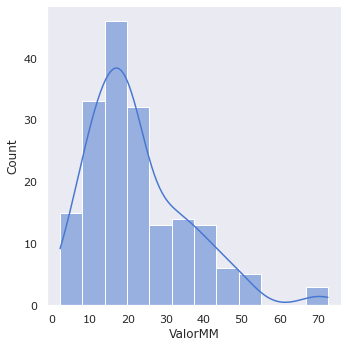

In [111]:
sns.displot(data=dfSalas_Dia,x='ValorMM',kde=True)

## <span style="color:blue">Gráfico Seaborn No 4</span>

Dentro de este ejercicio se tomo el dataset ***Vlr_Pedidos_Depto_Categoria_CO*** utilizando el comando **displot** con el cual se busca analizar la dispersión de los datos de la variable ***ValorMM**

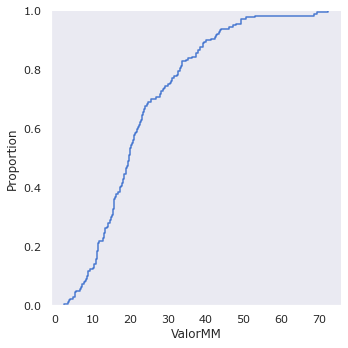

In [112]:
sns.displot(data=dfSalas_Dia,x='ValorMM',kind="ecdf")

## <span style="color:blue">Gráfico Seaborn No 5</span>

Dentro de este ejercicio se tomo el dataset ***dfSalas_Dia*** con el cual se busca analizar la relación que existe entre las variables ***ValorMM*** y ***Vlr_UnitarioMM***, donde las regiones mas oscuras se visualiza la correlación existente entre estas dos variables

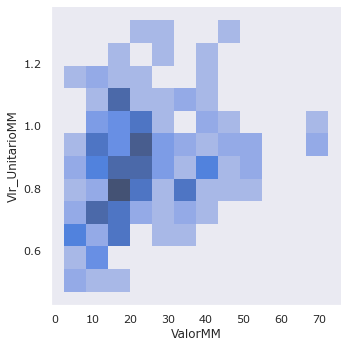

In [113]:
sns.displot(data=dfSalas_Dia,x='ValorMM',y='Vlr_UnitarioMM')

## <span style="color:blue">Gráfico Seaborn No 6</span>

Dentro de este ejercicio se tomo el dataset ***Vlr_Pedidos_Depto_Categoria_CO*** utilizando el comando **displot** con el cual se busca analizar la dispersión de los datos de la variable ***ValorMM**

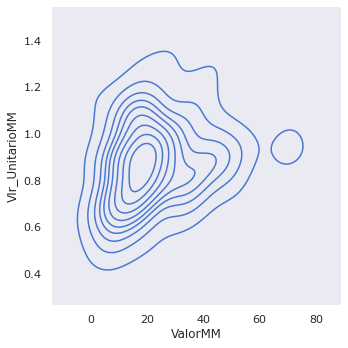

In [114]:
sns.displot(data=dfSalas_Dia,x='ValorMM',y='Vlr_UnitarioMM', kind="kde")

In [115]:
Vlr_Pedidos_Depto_Categoria.head()

,DEPARTAMENTO,SUBCATEGORIA,ValorMM,Cant
0,P001 - COMEDORES,BIFT - BIFFET,37.254226,92
1,P001 - COMEDORES,CONS - CONSOLAS,15.703002,42
2,P001 - COMEDORES,MBAR - MESAS DE BAR,17.733161,39
3,P001 - COMEDORES,MCO4 - MESAS DE 4P,34.550254,88
4,P001 - COMEDORES,MCO6 - MESAS DE 6P,51.222472,74


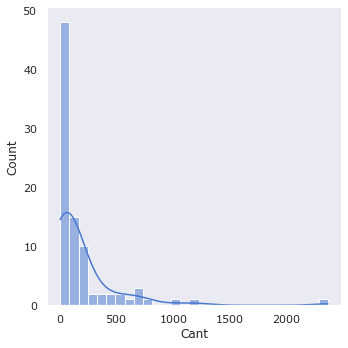

In [116]:
sns.displot(data=Vlr_Pedidos_Depto_Categoria,x='Cant',kde=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


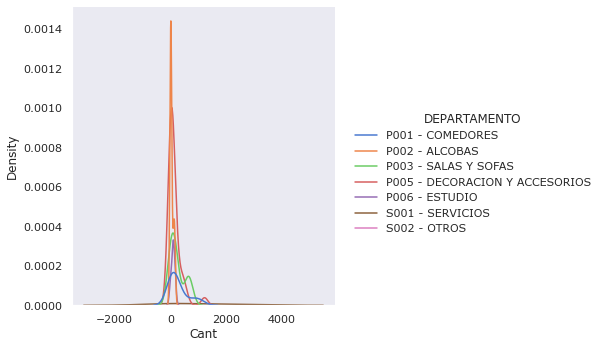

In [117]:
sns.displot(data=Vlr_Pedidos_Depto_Categoria, x='Cant', hue="DEPARTAMENTO", kind="kde")

In [136]:
#sns.displot(data=Vlr_Pedidos_Depto_Categoria, x='Cant', col="DEPARTAMENTO", hue="SUBCATEGORIA", kind="kde")

In [118]:
dfSalas_Comedores_Dia = dfDpto_Dia[dfDpto_Dia.DEPARTAMENTO.isin(['P003 - SALAS Y SOFAS' ,'P001 - COMEDORES'])]

In [119]:
dfSalas_Comedores_Dia #df5 = df4[df4.Estado_Mov.isin(['Cumplido','Aprobado', 'Comprometido'])]

,Fecha,DEPARTAMENTO,ValorMM,Cant,Vlr_UnitarioMM
0,2021-10-01,P001 - COMEDORES,1.996476,4,0.499119
2,2021-10-01,P003 - SALAS Y SOFAS,22.196720,24,0.924863
6,2021-10-02,P001 - COMEDORES,10.101374,19,0.531651
8,2021-10-02,P003 - SALAS Y SOFAS,21.871053,29,0.754174
12,2021-10-03,P001 - COMEDORES,13.439943,32,0.419998
...,...,...,...,...,...
1014,2022-03-29,P003 - SALAS Y SOFAS,18.905769,20,0.945288
1018,2022-03-30,P001 - COMEDORES,6.452076,6,1.075346
1020,2022-03-30,P003 - SALAS Y SOFAS,12.771925,14,0.912280
1024,2022-03-31,P001 - COMEDORES,2.199872,4,0.549968


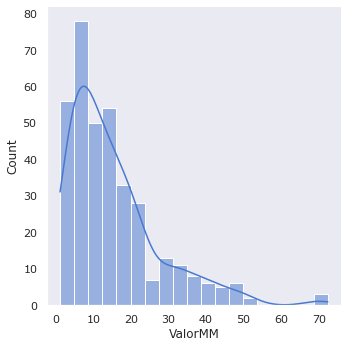

In [120]:
sns.displot(data=dfSalas_Comedores_Dia,x='ValorMM',kde=True)

## <span style="color:blue">Gráfico Seaborn No 7</span>

Con el siguiente gráfico se busca analizar la variable ***ValorMM*** a partir del dataset **dfSalas_Comedores_Dia** utilizando el parámetro **hue**, con el cual se busca hacer un desgloce o agrupamiento por la variable ***Departamento***, como se detalla a continuación:

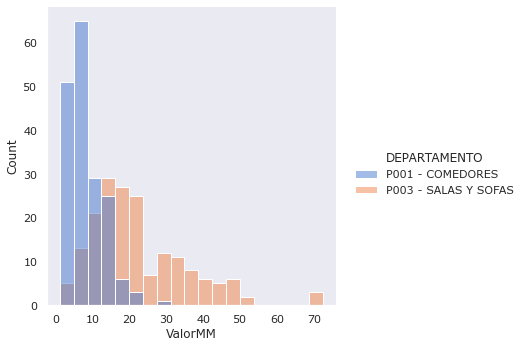

In [121]:
sns.displot(data=dfSalas_Comedores_Dia, x='ValorMM',hue='DEPARTAMENTO')
plt.show()

Con el siguiente gráfico se busca analizar las variables ***ValorMM*** y ***Cant*** a partir del dataset **dfSalas_Comedores_Dia** utilizando el parámetro **hue**, con el cual se busca hacer un desgloce o agrupamiento por la variable ***Departamento***, como se detalla a continuación:

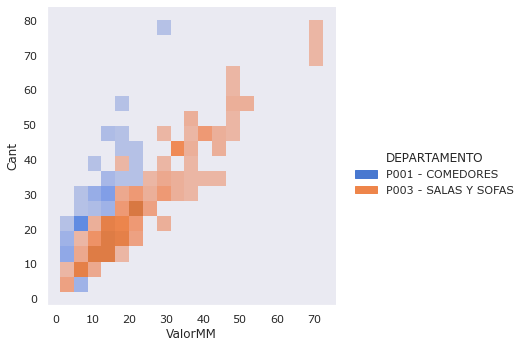

In [122]:
sns.displot(data=dfSalas_Comedores_Dia, x='ValorMM',y='Cant',hue='DEPARTAMENTO')
plt.show()

Con el siguiente gráfico se busca analizar la variable ***ValorMM*** a partir del dataset **dfSalas_Comedores_Dia** utilizando no solo el parámetro **hue**, con el cual se busca hacer un desgloce o agrupamiento por la variable ***Departamento***, sino adicional a este el comando **kind** como se detalla a continuación:

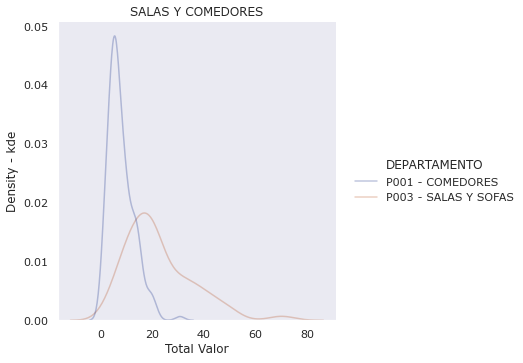

In [123]:
sns.displot(data=dfSalas_Comedores_Dia, x='ValorMM',hue='DEPARTAMENTO',kind='kde',legend=True,palette='dark',alpha=.25)
plt.title('SALAS Y COMEDORES')
plt.xlabel('Total Valor')
plt.ylabel('Density - kde')
plt.show()

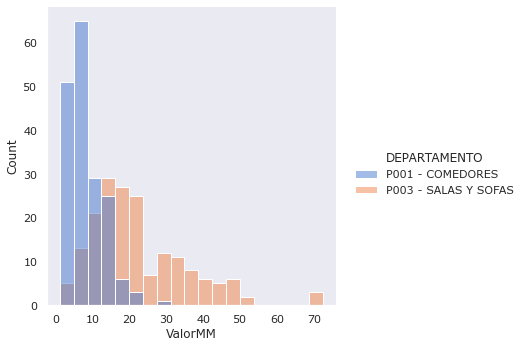

In [124]:
sns.displot(data=dfSalas_Comedores_Dia,x='ValorMM', hue="DEPARTAMENTO")

## <span style="color:blue">Gráfico Kdeplot</span>

Con el siguiente gráfico Kdeplot o gráfico de densidad, se utiliza el parámetro **Shade=True** para rellenar el área bajo la curva, de igual forma se utiliza el parámeto **bw_adjust=1** para el ajuste de los ejes, con este gráfico se puede visualiar la distribución y el comportamiento real de los datos de la variable ***ValorMM***, agrupado por la variable ***Departamento** mediante el parámetro **hue**

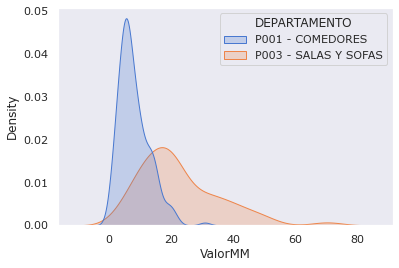

In [125]:
sns.kdeplot(data=dfSalas_Comedores_Dia,x='ValorMM',hue="DEPARTAMENTO",cumulative=False,shade=True,bw_adjust=1)
plt.show()

## <span style="color:blue">Simplicar los Gráficos</span>

Para simplificar los gráficos se utiliza la funcion **displot** en donde se pude configurar el tipo de gráfico requerido mediente el parámetro **kind** que para el ejemplo se estableción en ***kde*** o gráfico de densidad de la dispersión, no obstante se puede llamar cualquier tipo de gráfico permitido

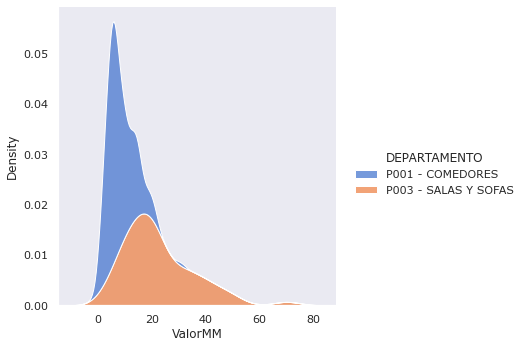

In [126]:
sns.displot(data=dfSalas_Comedores_Dia,x='ValorMM',hue="DEPARTAMENTO",kind='kde',multiple='stack') #kde
plt.show()

## <span style="color:blue">Gráfico Ecdfplot</span>

Mediante este grafico se puede escalonar la proporciones de variable ***ValorMM*** agrupado por la variable ***Departamento***

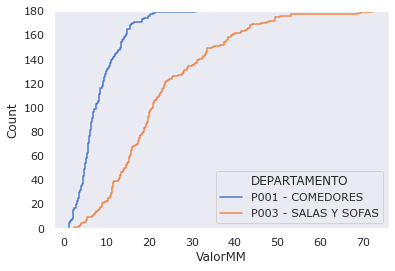

In [127]:
sns.ecdfplot(data=dfSalas_Comedores_Dia,x='ValorMM',hue="DEPARTAMENTO",stat='count')
plt.show()

In [128]:
Vlr_Pedidos_Depto_CO=dfDIa_Detalle.groupby(['Desc_CO','DEPARTAMENTO']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        
        
    }

)
Vlr_Pedidos_Depto_CO

ValorMM  \
Desc_CO                       DEPARTAMENTO                                  
PUNTO DE VENTA AV 68          P001 - COMEDORES                 463.290330   
                              P002 - ALCOBAS                   109.080137   
                              P003 - SALAS Y SOFAS            1147.493990   
                              P005 - DECORACION Y ACCESORIOS    73.136292   
                              P006 - ESTUDIO                    29.255919   
                              S001 - SERVICIOS                  41.407000   
                              S002 - OTROS                       0.020241   
PUNTO DE VENTA CALI           P001 - COMEDORES                 154.709041   
                              P002 - ALCOBAS                    36.715020   
                              P003 - SALAS Y SOFAS             410.139176   
                              P005 - DECORACION Y ACCESORIOS    26.445712   
                              P006 - ESTUDIO                    10.304873   
                              S001 - SERVICIOS                   0.530000   
PUNTO DE VENTA CALLE 134      P001 - COMEDORES                 205.839884   
                              P002 - ALCOBAS                    39.926465   
                              P003 - SALAS Y SOFAS             583.398059   
                              P005 - DECORACION Y ACCESORIOS    31.664833   
                              P006 - ESTUDIO                    22.679151   
                              S001 - SERVICIOS                  24.368000   
                              S002 - OTROS                       0.001840   
PUNTO DE VENTA CC SANTA FE    P001 - COMEDORES                  10.963193   
                              P002 - ALCOBAS                     8.607322   
                              P003 - SALAS Y SOFAS              34.965097   
                              P005 - DECORACION Y ACCESORIOS     2.321716   
                              P006 - ESTUDIO                     0.640925   
                              S001 - SERVICIOS                   2.475000   
PUNTO DE VENTA CENTRO MAYOR   P001 - COMEDORES                 209.103434   
                              P002 - ALCOBAS                    44.755697   
                              P003 - SALAS Y SOFAS             744.064789   
                              P005 - DECORACION Y ACCESORIOS    24.620090   
                              P006 - ESTUDIO                    15.153047   
                              S001 - SERVICIOS                  28.682500   
PUNTO DE VENTA OUTLET         P001 - COMEDORES                 136.319695   
                              P002 - ALCOBAS                    10.544999   
                              P003 - SALAS Y SOFAS             249.670894   
                              P005 - DECORACION Y ACCESORIOS    24.013016   
                              P006 - ESTUDIO                     8.927852   
                              S001 - SERVICIOS                   0.060000   
PUNTO DE VENTA PLAZA CENTRAL  P001 - COMEDORES                  76.326221   
                              P002 - ALCOBAS                    62.307467   
                              P003 - SALAS Y SOFAS             286.785099   
                              P005 - DECORACION Y ACCESORIOS    24.230492   
                              P006 - ESTUDIO                    14.958479   
                              S001 - SERVICIOS                  16.049000   
                              S002 - OTROS                       0.007360   
PUNTO DE VENTA PLAZA IMPERIAL P001 - COMEDORES                 112.986934   
                              P002 - ALCOBAS                    18.357933   
                              P003 - SALAS Y SOFAS             361.344916   
                              P005 - DECORACION Y ACCESORIOS    16.894587   
                              P006 - ESTUDIO                    12.758760   
                              S001 - SERVICIOS                

In [129]:
Vlr_Pedidos_Depto_CO=Vlr_Pedidos_Depto_CO.reset_index()

In [130]:
Vlr_Pedidos_Depto_CO['Vlr_UnitarioMM']=Vlr_Pedidos_Depto_CO['ValorMM']/Vlr_Pedidos_Depto_CO['Cant']

In [131]:
Vlr_Pedidos_Depto_CO.head()

,Desc_CO,DEPARTAMENTO,ValorMM,Cant,Vlr_UnitarioMM
0,PUNTO DE VENTA AV 68,P001 - COMEDORES,463.290330,872,0.531296
1,PUNTO DE VENTA AV 68,P002 - ALCOBAS,109.080137,214,0.509720
2,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,1147.493990,1243,0.923165
3,PUNTO DE VENTA AV 68,P005 - DECORACION Y ACCESORIOS,73.136292,1260,0.058045
4,PUNTO DE VENTA AV 68,P006 - ESTUDIO,29.255919,110,0.265963


In [132]:
Vlr_Pedidos_Depto_CO = Vlr_Pedidos_Depto_CO[Vlr_Pedidos_Depto_CO.DEPARTAMENTO.isin(['P003 - SALAS Y SOFAS' ,'P001 - COMEDORES'])]

## <span style="color:blue">Gráficos para variables categóricas</span>

### <span style="color:blue">Función Countplot</span>

Con esta función se genera un grafico con el conteo de la variable categórica (núermo de registros), que para el ejercicio se tomó la variable ***Departamento*** agrupado por la variable tiendas **Desc_CO**

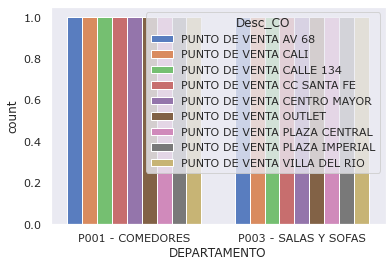

In [133]:
sns.countplot(data=Vlr_Pedidos_Depto_CO,x='DEPARTAMENTO',hue='Desc_CO')
plt.show()

In [134]:
df5.head()

,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,Cant,...,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA,ValorMM,Vlr_UnitarioMM
Fecha,,,,,,,,,,,,,,,,,,,,,
2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,1,...,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS,0.607441,0.607441
2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,1,...,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES,2.679748,2.679748
2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,1,...,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L,2.834370,2.834370
2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,1,...,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE,0.060000,0.060000
2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,1,...,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES,0.193912,0.193912


In [135]:
dobs=df5.reset_index()

In [136]:
dobs.head()

,Fecha,CO,Desc_CO,Item,Referencia,Desc_Item,Tipo_Doc,Doc,Estado_Mov,Bodega,...,Cliente,Cod_Vendedor,Vendedor,Tipo_Inv,ORIGEN,DEPARTAMENTO,CATEGORIA,SUBCATEGORIA,ValorMM,Vlr_UnitarioMM
0,2021-10-01,100,PUNTO DE VENTA AV 68,1529,XA0605,ESPEJO DECORATIVO EDLIN REDONDO GRIS/NG,PV,PV-00000229,Cumplido,100,...,PEÑA ROZO DIANA PAOLA,F013,MORENO DIAZ LIDA ESPERANZA,MERCANCIA IMPORTADA,IMP - IMPORTADO,P005 - DECORACION Y ACCESORIOS,DEC - DECORACIÓN,ESPE - ESPEJOS,0.607441,0.607441
1,2021-10-01,100,PUNTO DE VENTA AV 68,4237,D05307,SALA MODULAR CESAR 3C,PV,PV-00000233,Cumplido,100,...,SUAZA NORBI,F007,ARIAS HERNANDEZ FREDY,PRODUCTO TERMINADO TAPICERIA,MAN - MANUFACTURADO,P003 - SALAS Y SOFAS,SOF - SOFAS,MODU - SOFAS MODULARES,2.679748,2.679748
2,2021-10-01,100,PUNTO DE VENTA AV 68,1927,XC0022,SALA L RECLINO MEAGAN CON BAUL NEGRO 3C,PV,PV-00000234,Cumplido,1,...,GARIBELLO MATEUS WILLIAM FERNANDO,F003,BAQUERO FREDY RICO,MERCANCIA IMPORTADA,IMP - IMPORTADO,P003 - SALAS Y SOFAS,REC - RECLINABLES,RCLL - RECLINABLES EN L,2.834370,2.834370
3,2021-10-21,104,PUNTO DE VENTA CALLE 134,34,SS0007,SS TRANSPORTE BOGOTA ZONA2 7A10,PV,PV-00000146,Cumplido,1,...,VARGAS SANDRA,F009,PEÑA VALENZUELA MARIA FERNANDA,VENTA DE TRANSPORTE M/CIAS,,S001 - SERVICIOS,S00 - OTROS,TRAN - TRANSPORTE,0.060000,0.060000
4,2021-10-21,102,PUNTO DE VENTA CENTRO MAYOR,795,BR0046,ESTANTE PEAK 5 ENT RT3122 RUSTICO/BLANCO,PV,PV-00000184,Cumplido,1,...,GOMEZ NICOL,F012,FUENTES HERRERA OSCAR JAVIER,MERCANCIA IMPORTADA,IMP - IMPORTADO,P006 - ESTUDIO,EST - ESTANTES,ESTA - ESTANTES,0.193912,0.193912


In [137]:
dfPedidoDiaDptoCO=dfDIa_Detalle.groupby(['Fecha','Desc_CO','DEPARTAMENTO']).aggregate(
    {
        'ValorMM':np.sum,
        'Cant':np.sum,
        
        
    }

)
dfPedidoDiaDptoCO

ValorMM  \
Fecha      Desc_CO                       DEPARTAMENTO                               
2021-10-01 PUNTO DE VENTA AV 68          P001 - COMEDORES                1.131097   
                                         P003 - SALAS Y SOFAS            9.162270   
                                         P005 - DECORACION Y ACCESORIOS  1.026394   
                                         S001 - SERVICIOS                0.220000   
           PUNTO DE VENTA CALI           P003 - SALAS Y SOFAS            0.840252   
...                                                                           ...   
2022-03-31 PUNTO DE VENTA PLAZA IMPERIAL S001 - SERVICIOS                0.060000   
           PUNTO DE VENTA VILLA DEL RIO  P001 - COMEDORES                0.319244   
                                         P003 - SALAS Y SOFAS            3.116639   
                                         P005 - DECORACION Y ACCESORIOS  0.240168   
                                         S001 - SERVICIOS                0.065000   

                                                                         Cant  
Fecha      Desc_CO                       DEPARTAMENTO                          
2021-10-01 PUNTO DE VENTA AV 68          P001 - COMEDORES                   2  
                                         P003 - SALAS Y SOFAS               9  
                                         P005 - DECORACION Y ACCESORIOS     6  
                                         S001 - SERVICIOS                   3  
           PUNTO DE VENTA CALI           P003 - SALAS Y SOFAS               1  
...                                                                       ...  
2022-03-31 PUNTO DE VENTA PLAZA IMPERIAL S001 - SERVICIOS                   1  
           PUNTO DE VENTA VILLA DEL RIO  P001 - COMEDORES                   1  
                                         P003 - SALAS Y SOFAS               2  
                                         P005 - DECORACION Y ACCESORIOS     2  
                                         S001 - SERVICIOS                   1  

[4354 rows x 2 columns]

In [138]:
dfPedidoDiaDptoCO=dfPedidoDiaDptoCO.reset_index()

In [139]:
dfPedidoDiaDptoCO = dfPedidoDiaDptoCO[dfPedidoDiaDptoCO.DEPARTAMENTO.isin(['P003 - SALAS Y SOFAS' ,'P001 - COMEDORES'])]

In [140]:
dfPedidoDiaDptoCO.head()

,Fecha,Desc_CO,DEPARTAMENTO,ValorMM,Cant
0,2021-10-01,PUNTO DE VENTA AV 68,P001 - COMEDORES,1.131097,2
1,2021-10-01,PUNTO DE VENTA AV 68,P003 - SALAS Y SOFAS,9.162270,9
4,2021-10-01,PUNTO DE VENTA CALI,P003 - SALAS Y SOFAS,0.840252,1
5,2021-10-01,PUNTO DE VENTA CALLE 134,P001 - COMEDORES,0.641093,1
7,2021-10-01,PUNTO DE VENTA CALLE 134,P003 - SALAS Y SOFAS,1.518975,2


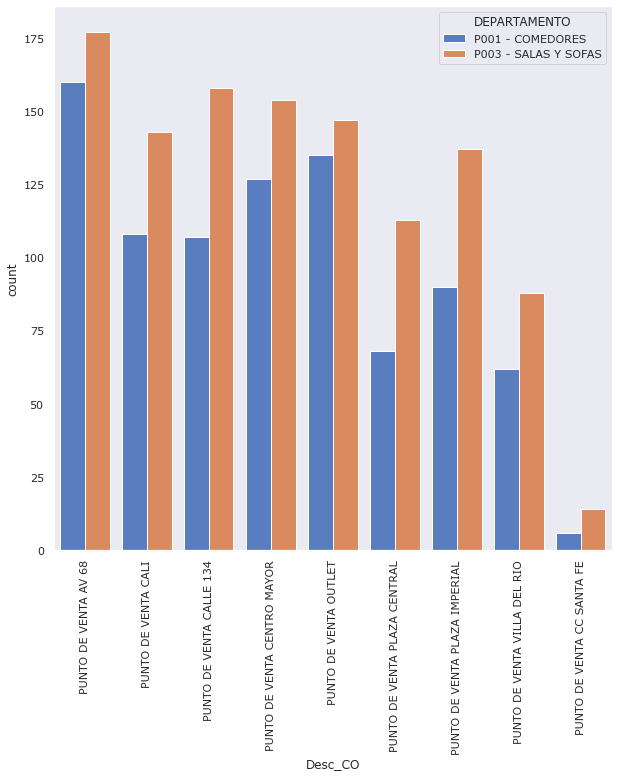

In [141]:
plt.figure(figsize=(10,10))
sns.countplot(data=dfPedidoDiaDptoCO,x='Desc_CO',hue='DEPARTAMENTO')
plt.xticks(rotation=90)
plt.show()

## <span style="color:blue">Gráficos para variables categóricas</span>

### <span style="color:blue">Función Stripplot</span>

Con esta función se genera un diagrama de dispersión basado en las categorías de la variable ***Desc_CO*** en relación con el valor total de las ventas ***ValorMM*** y agrupado por la variable ***Departamento*** 

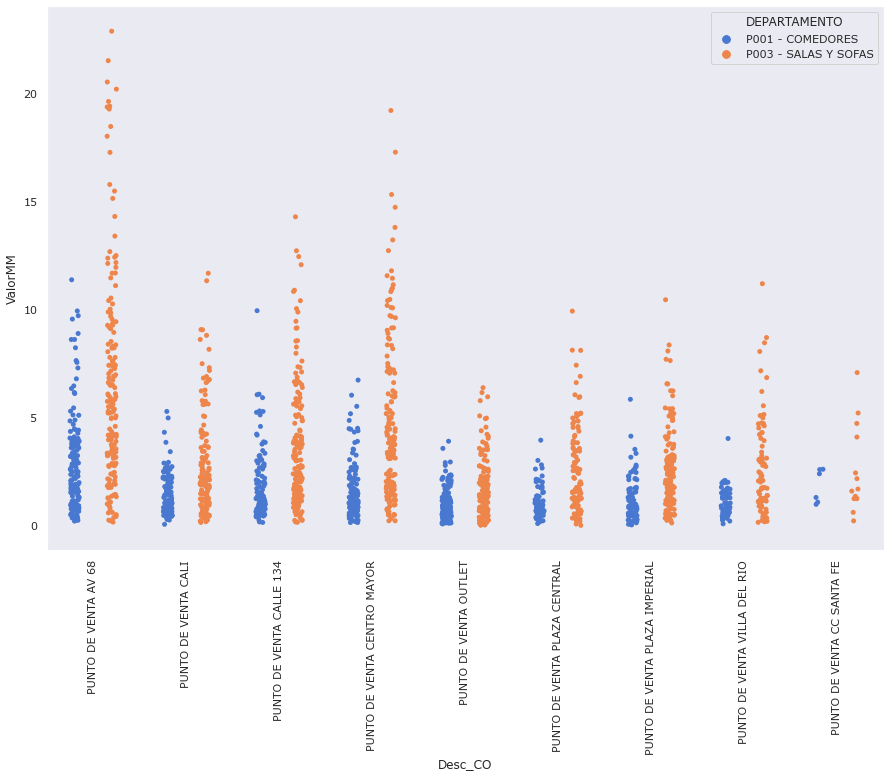

In [142]:
plt.figure(figsize=(15,10))
sns.stripplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True)
plt.xticks(rotation=90)
plt.show()

 ## <span style="color:blue">Gráficos para variables categóricas</span>

### <span style="color:blue">Función swarmplot</span>

Un gráfico de swarmplot es un tipo de gráfico de dispersión que se utiliza para representar valores categóricos, para el ejercicio se analizó la variable categórica ***Desc_CO*** en relación con el valor total de las ventas de la variable cuantitativa ***ValorMM*** y agrupado por la variable ***Departamento*** 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points

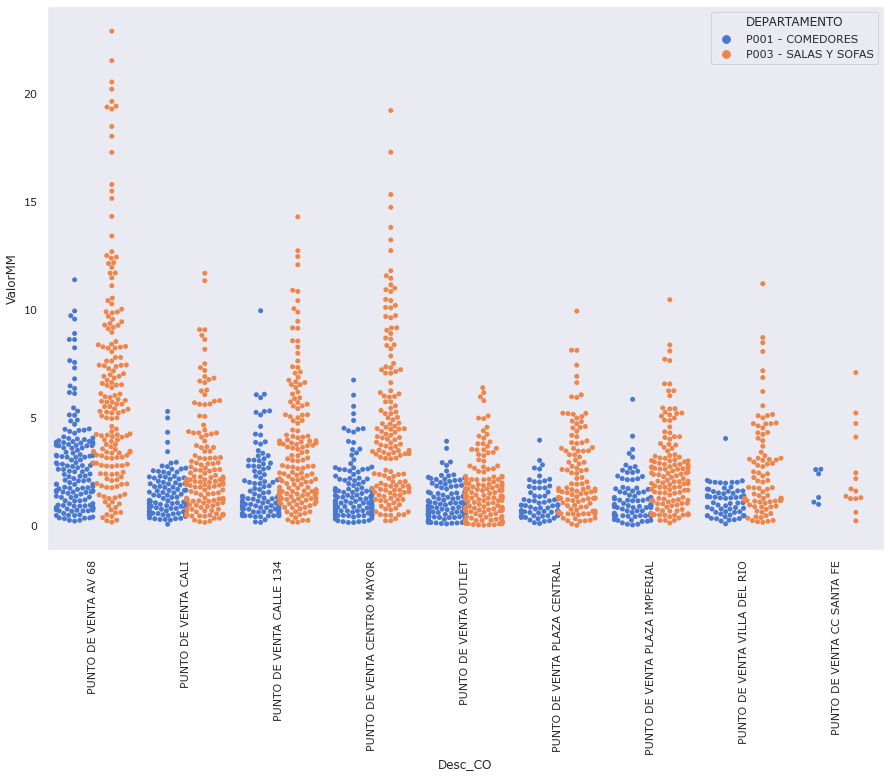

In [144]:
plt.figure(figsize=(15,10))
sns.swarmplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True)
plt.xticks(rotation=90)
plt.show()

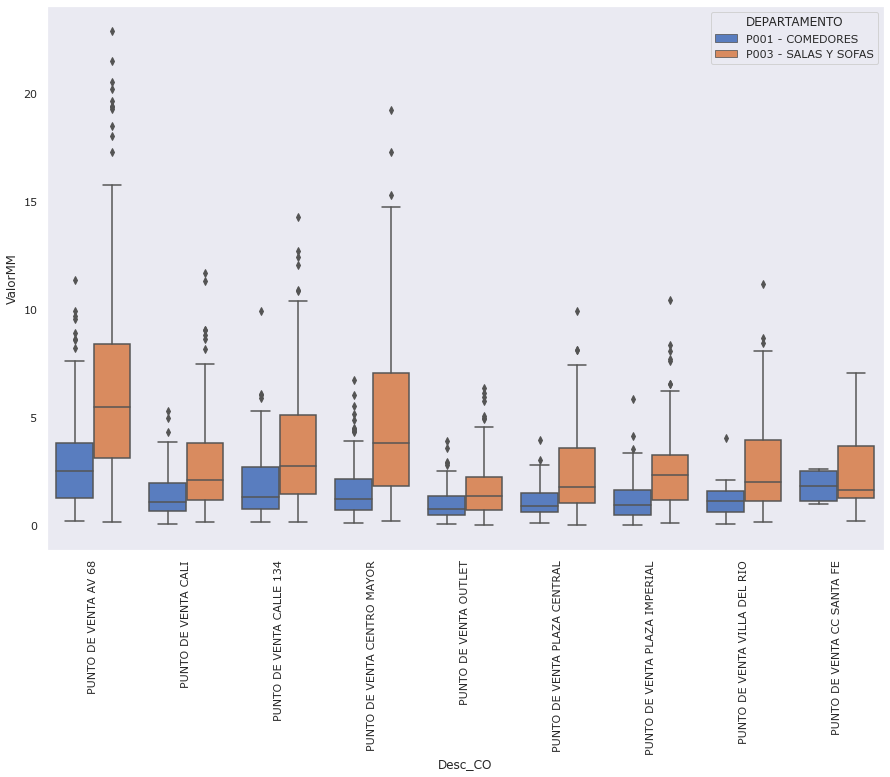

In [145]:
plt.figure(figsize=(15,10))

sns.boxplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True)
#sns.swarmplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True)
plt.xticks(rotation=90)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 26.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 14.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 23.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.0% of the points

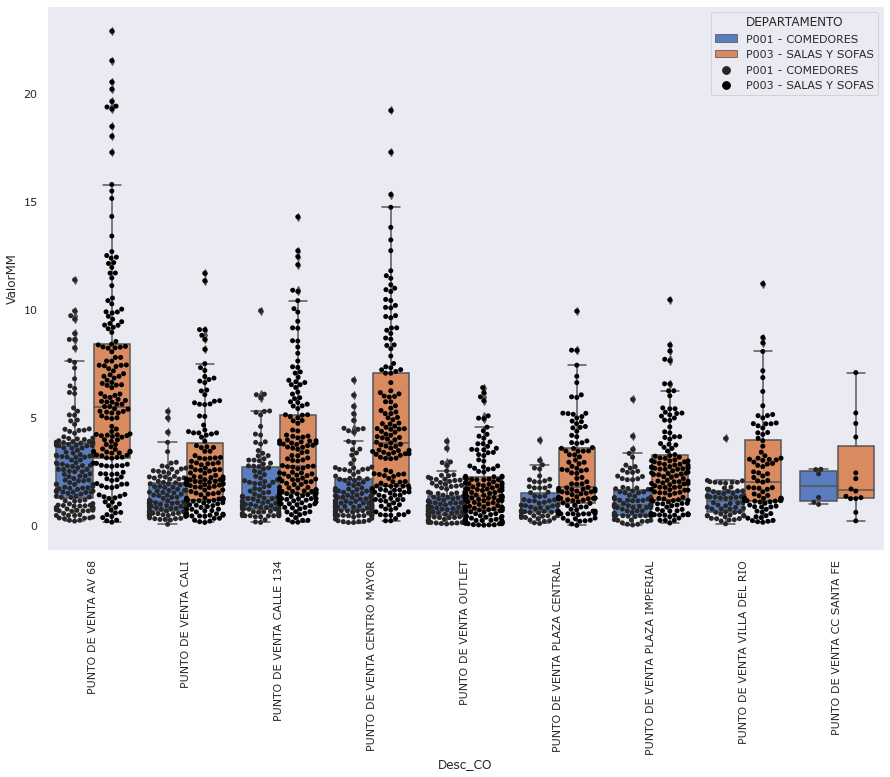

In [146]:
plt.figure(figsize=(15,10))

sns.boxplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True)
sns.swarmplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True,color='0', marker='o')
plt.xticks(rotation=90)
plt.show()

 ## <span style="color:blue">Gráficos para variables categóricas</span>

### <span style="color:blue">Función violinplot</span>

La función violinplot() crea un gráfico de este tipo y representa la distribución como una combinación entre el gráfico de densidad del núcleo y un diagrama de caja. Es muy utilizado por analistas y estadísticos para comprender la distribución de datos categóricos. Su principal ventaja sobre los diagramas de caja tradicionales es que también se pueden usar para distribuciones con múltiples picos; para el ejercicio se analizó la variable categórica Desc_CO en relación con el valor total de las ventas de la variable cuantitativa ValorMM y agrupado por la variable Departamento

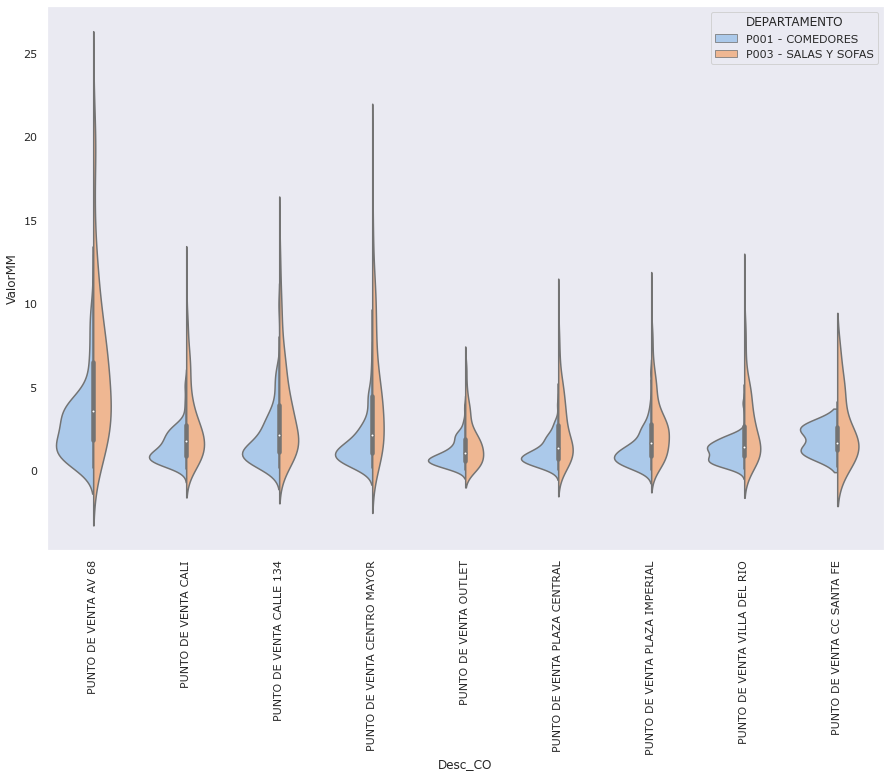

In [195]:
plt.figure(figsize=(15,10))

sns.violinplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO', split=True, palette='pastel')

plt.xticks(rotation=90)
plt.show()

<AxesSubplot:ylabel='ValorMM'>

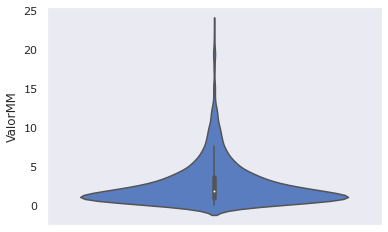

In [196]:
sns.violinplot(data=dfPedidoDiaDptoCO,y='ValorMM')

## <span style="color:blue">Gráficos para variables categóricas</span>

### <span style="color:blue">Función catplot</span>

Con la funcion catplot permite manejar cualquier tipo de gráfico según sea la naturaleza de los datos a analizar, se utiliza para trabajar con datos categóricos de manera eficiente; para el ejercicio se analizó la variable categórica ***Desc_CO*** en relación con el valor total de las ventas de la variable cuantitativa ***ValorMM***, el tipo de gráfico se estableció en **box** mediente el parámetro **kink** y con el parámetro **col** se puede adicionar una variable que para el ejercicio se tomo ***Departamento*** para mostrar el comportamiento de las variables objetivo a analizar en diferentes columnas.

<Figure size 1080x720 with 0 Axes>

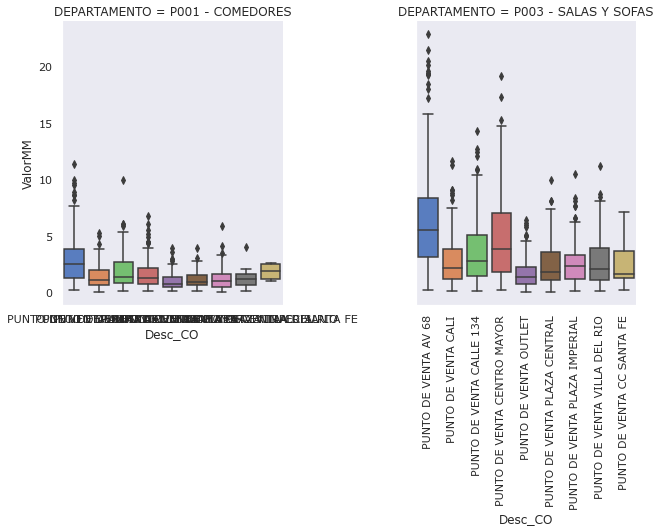

In [164]:
plt.figure(figsize=(15,10))
sns.catplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',dodge=True,kind='box',col='DEPARTAMENTO')
plt.xticks(rotation=90)
plt.xticks(rotation=90)
plt.show()
#sns.catplot(data=dfPedidoDiaDptoCO,x='Desc_CO',y='ValorMM',hue='DEPARTAMENTO',dodge=True,kind='box',col='DEPARTAMENTO')

## <span style="color:blue">Gráficos Relacionales de la librería Seaborn</span>

### <span style="color:blue">Scatterplot</span>

Esta función permite obtener gráficos mas descriptivos y de fácil entendimiento mediante el uso de la leyenda, que para nuestro ejercicio se compara las variables **Cant** y **ValorMM** agrupado por la variable **Dia**

In [174]:
dfPedidoDiaDptoCO['Fecha'] = pd.to_datetime(dfPedidoDiaDptoCO['Fecha']) 
dfPedidoDiaDptoCO['Dia'] = dfPedidoDiaDptoCO['Fecha'].dt.day_name()

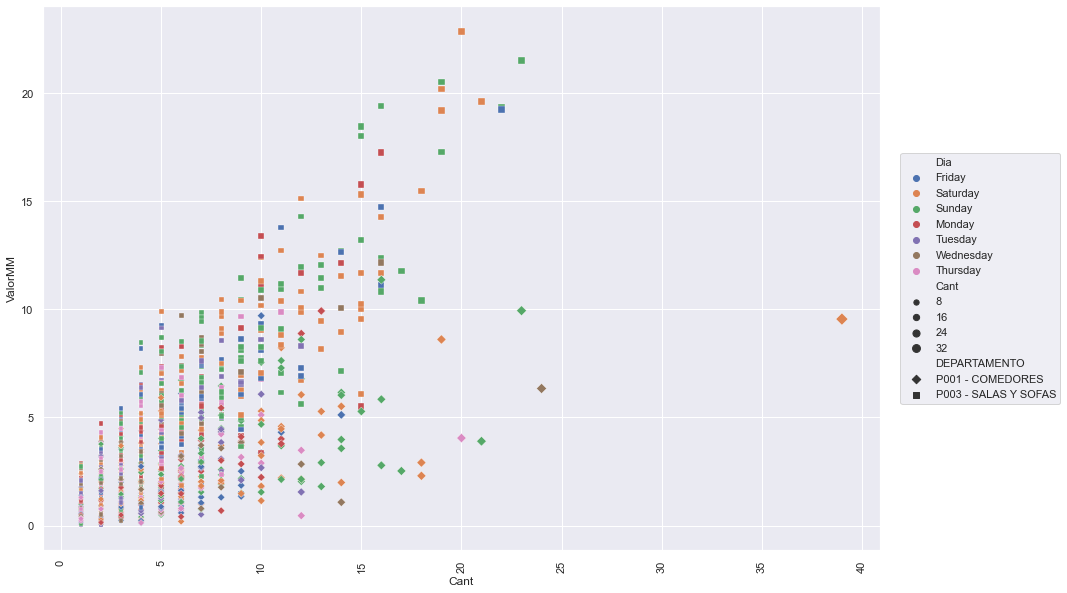

In [190]:
plt.figure(figsize=(15,10))
markers = {"P001 - COMEDORES":"D", "P003 - SALAS Y SOFAS":"s"}
sns.scatterplot(data=dfPedidoDiaDptoCO,x='Cant',y='ValorMM',hue='Dia',style='DEPARTAMENTO',size='Cant',markers=markers)
plt.legend(loc='center',bbox_to_anchor=(1.12,0.5))
plt.xticks(rotation=90)
plt.show()

### <span style="color:blue">Lineplot</span>

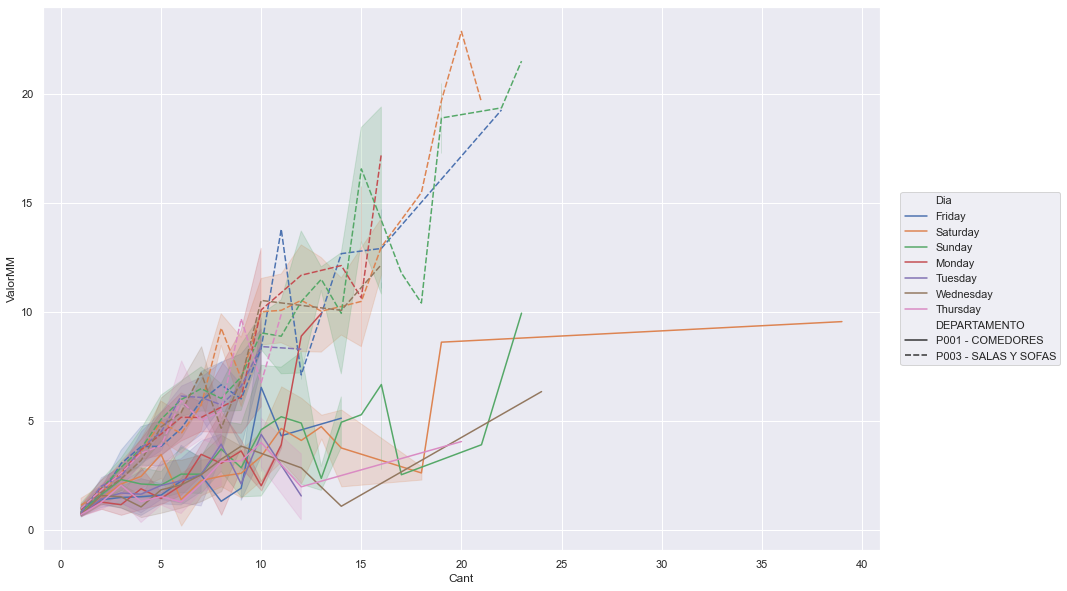

In [184]:
plt.figure(figsize=(15,10))
sns.lineplot(data=dfPedidoDiaDptoCO,x='Cant',y='ValorMM',hue='Dia',style='DEPARTAMENTO')
plt.legend(loc='center',bbox_to_anchor=(1.12,0.5))
plt.show()

### <span style="color:blue">Relplot</span>

<Figure size 1440x720 with 0 Axes>

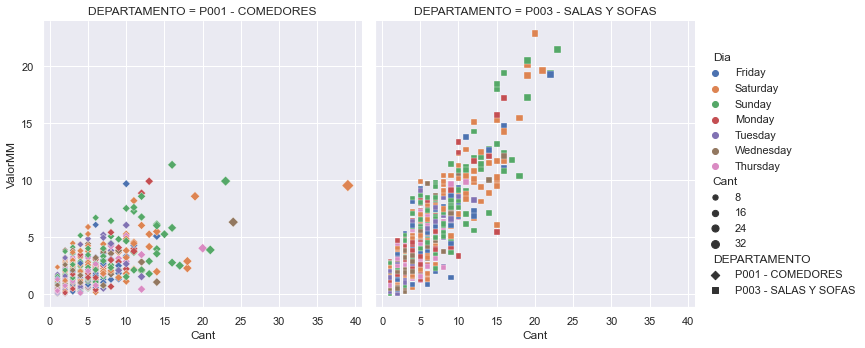

In [192]:
plt.figure(figsize=(20,10))
markers = {"P001 - COMEDORES":"D", "P003 - SALAS Y SOFAS":"s"}
sns.relplot(data=dfPedidoDiaDptoCO,x='Cant',y='ValorMM',hue='Dia',style='DEPARTAMENTO',size='Cant',col='DEPARTAMENTO',markers=markers)
plt.show()